Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import isnan
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Reading the Dataset. Open dataset on Kaggle : https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hotelcancellation_project/hotelcancellation_booking.csv')

In [ ]:
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [ ]:
df.tail()

Booking_ID  number of adults  number of children  \
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights type of meal  \
36280                         0                      2  Meal Plan 2   
36281                         1                      3  Meal Plan 1   
36282                         1                      3  Meal Plan 1   
36283                         0                      4  Meal Plan 1   
36284                         0                      5  Meal Plan 1   

       car parking space    room type  lead time market segment type  \
36280                  0  Room_Type 1        346              Online   
36281                  0  Room_Type 1         34              Online   
36282                  0  Room_Type 4         83              Online   
36283                  0  Room_Type 1        121             Offline   
36284                  0  Room_Type 4         44              Online   

       repeated  P-C  P-not-C  average price  special requests  \
36280         0    0        0         115.00                 1   
36281         0    0        0         107.55                 1   
36282         0    0        0         105.61                 1   
36283         0    0        0          96.90                 1   
36284         0    0        0         133.44                 3   

      date of reservation booking status  
36280           9/13/2018       Canceled  
36281          10/15/2017   Not_Canceled  
36282          12/26/2018   Not_Canceled  
36283            7/6/2018   Not_Canceled  
36284          10/18/2018   Not_Canceled

In [ ]:
df.sample(3)

Booking_ID  number of adults  number of children  \
11177   INN11178                 2                   0   
29845   INN29846                 2                   0   
10541   INN10542                 2                   1   

       number of weekend nights  number of week nights type of meal  \
11177                         1                      0  Meal Plan 1   
29845                         0                      2  Meal Plan 1   
10541                         1                      2  Meal Plan 1   

       car parking space    room type  lead time market segment type  \
11177                  0  Room_Type 1         16              Online   
29845                  0  Room_Type 4         40              Online   
10541                  0  Room_Type 4        109              Online   

       repeated  P-C  P-not-C  average price  special requests  \
11177         0    0        0          111.0                 0   
29845         0    0        0          139.5                 0   
10541         0    0        0          143.7                 1   

      date of reservation booking status  
11177           5/29/2018       Canceled  
29845           10/5/2018       Canceled  
10541            8/5/2018   Not_Canceled

In [ ]:
df.shape

(36285, 17)

In [ ]:
df.describe()

number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    126.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   

                P-C       P-not-C  average price  special requests  
count  36285.000000  36285.000000   36285.000000      36285.000000  
mean       0.023343      0.153369     103.421636          0.619733  
std        0.368281      1.753931      35.086469          0.786262  
min        0.000000      0.000000       0.000000          0.000000  
25%        0.000000      0.000000      80.300000          0.000000  
50%        0.000000      0.000000      99.450000          0.000000  
75%        0.000000      0.000000     120.000000          1.000000  
max       13.000000     58.000000     540.000000          5.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
#checking unique values
df.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [ ]:
#understanding the unique values
print(df['type of meal'].unique())
print(df['room type'].unique())
print(df['market segment type'].unique())
print(df['average price'].unique())
print(df['booking status'].unique())
print(df['car parking space'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
[ 88.   106.68  50.   ... 118.43 137.25 167.8 ]
['Not_Canceled' 'Canceled']
[0 1]


In [ ]:
#checking null values
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [ ]:
df["booking status"].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

There is class imbalance problem on the data sheet. This may cause prediction bias. It can result in the prediction model predicting the majority class for most instances, ignoring the minority class. Also poor minority of minor class can lead to poor recall and precision for the minority class.

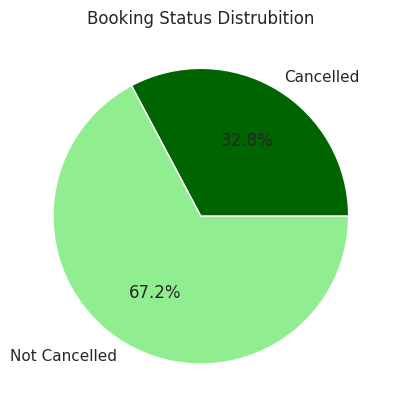

<Figure size 1200x800 with 0 Axes>

In [ ]:
#Classes are imbalanced. Most of the data is classified not cancelled.
plt.pie(
        x=[
        df[df['booking status'] == 'Canceled']['booking status'].count(),
        df[df['booking status'] == 'Not_Canceled']['booking status'].count()],
        labels=['Cancelled', 'Not Cancelled'],
        autopct='%1.1f%%',
        colors=['darkgreen', 'lightgreen'],
)
plt.title('Booking Status Distrubition')
plt.figure(figsize=(12, 8))
plt.show()

In [ ]:
#Let's balance the dataset

num_canceled = df[df['booking status'] == 'Canceled'].shape[0]
not_canceled_indices = df[df['booking status'] == 'Not_Canceled'].index
num_not_canceled_to_keep = num_canceled
drop_indices = not_canceled_indices.to_series().sample(len(not_canceled_indices) - num_not_canceled_to_keep, random_state=42)
balanced_df = df.drop(drop_indices)

print(balanced_df['booking status'].value_counts())

booking status
Not_Canceled    11889
Canceled        11889
Name: count, dtype: int64


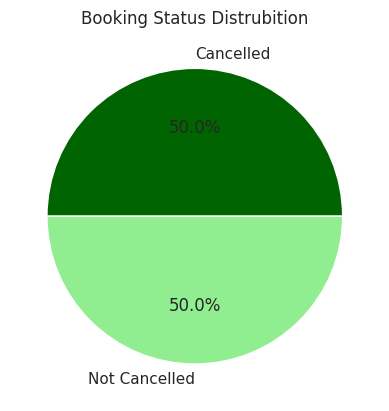

<Figure size 1200x800 with 0 Axes>

In [ ]:
#Classes are balanced now!
plt.pie(
        x=[
        balanced_df[balanced_df['booking status'] == 'Canceled']['booking status'].count(),
        balanced_df[balanced_df['booking status'] == 'Not_Canceled']['booking status'].count()],
        labels=['Cancelled', 'Not Cancelled'],
        autopct='%1.1f%%',
        colors=['darkgreen', 'lightgreen'],
)
plt.title('Booking Status Distrubition')
plt.figure(figsize=(12, 8))
plt.show()

In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23778 entries, 1 to 36283
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                23778 non-null  object 
 1   number of adults          23778 non-null  int64  
 2   number of children        23778 non-null  int64  
 3   number of weekend nights  23778 non-null  int64  
 4   number of week nights     23778 non-null  int64  
 5   type of meal              23778 non-null  object 
 6   car parking space         23778 non-null  int64  
 7   room type                 23778 non-null  object 
 8   lead time                 23778 non-null  int64  
 9   market segment type       23778 non-null  object 
 10  repeated                  23778 non-null  int64  
 11  P-C                       23778 non-null  int64  
 12  P-not-C                   23778 non-null  int64  
 13  average price             23778 non-null  float64
 14  special req

Checking the date values

In [ ]:
balanced_df["date of reservation"].value_counts()

date of reservation
6/15/2018     204
10/16/2017    177
5/13/2018     161
6/24/2018     157
11/4/2018     149
             ... 
7/24/2017       1
9/13/2016       1
5/20/2017       1
7/21/2017       1
7/28/2017       1
Name: count, Length: 552, dtype: int64

In [ ]:
balanced_df['date of reservation'] = pd.to_datetime(balanced_df['date of reservation'], errors='coerce')
balanced_df = balanced_df.dropna(subset=['date of reservation'])
year_counts = balanced_df['date of reservation'].dt.year.value_counts()

print(year_counts)

date of reservation
2018    20083
2017     3674
2016        1
Name: count, dtype: int64


In [ ]:
# Dropping rows with invalid dates
balanced_df = balanced_df.dropna(subset=['date of reservation'])

In [ ]:
#Checking date with most reservations out of curiosity

df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
reservation_counts = df['date of reservation'].value_counts()
most_reserved_date = reservation_counts.idxmax()
most_reserved_count = reservation_counts.max()

print("Date with the most reservations:", most_reserved_date)
print("Number of reservations on that date:", most_reserved_count)

Date with the most reservations: 2018-10-13 00:00:00
Number of reservations on that date: 254


In [ ]:
#Checking date with most reservations out of curiosity

df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
reservation_counts = df['date of reservation'].value_counts()
most_reserved_date = reservation_counts.idxmax()
most_reserved_count = reservation_counts.max()

print("Date with the most reservations:", most_reserved_date)
print("Number of reservations on that date:", most_reserved_count)

Date with the most reservations: 2018-10-13 00:00:00
Number of reservations on that date: 254


Outlier Analysis

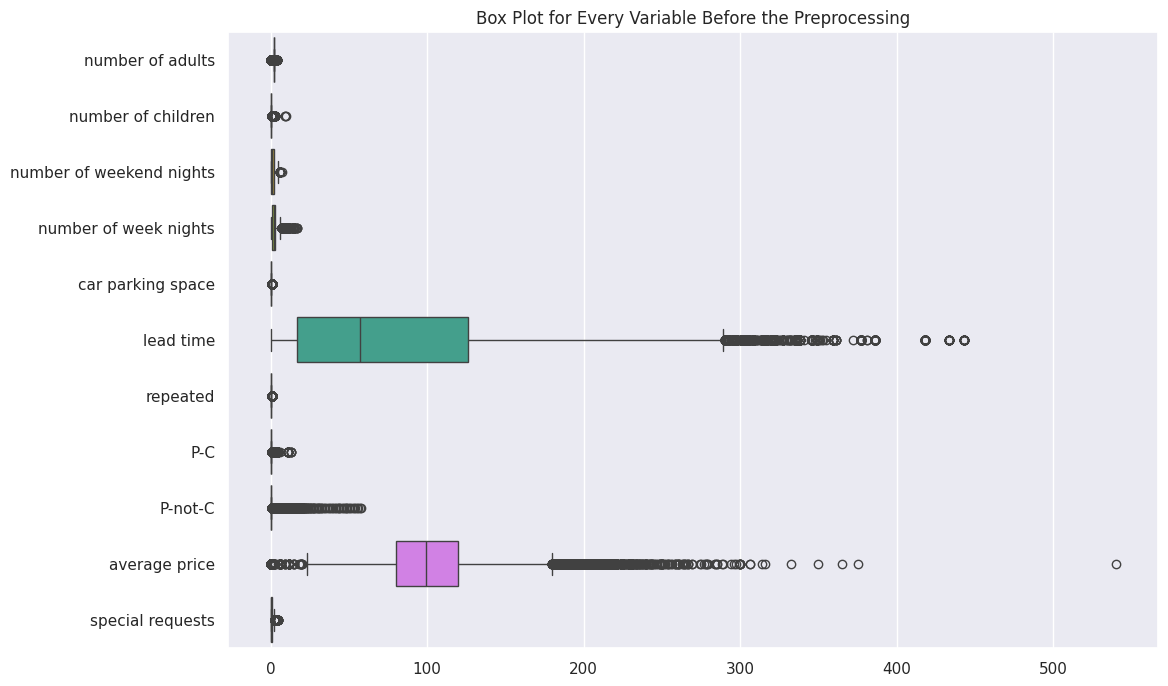

(23758, 17)


In [ ]:
# Create box plots for every variable before droping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=df, orient="h")
plt.title("Box Plot for Every Variable Before the Preprocessing")
plt.show()
print(balanced_df.shape)

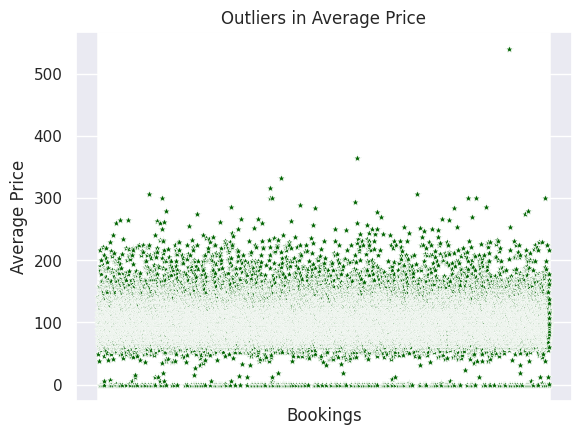

In [ ]:
sns.scatterplot(data=balanced_df,
                x="Booking_ID",
                y="average price",
                 marker="*",
                 color='darkgreen'

                )
plt.xlabel('Bookings')
plt.ylabel('Average Price')
plt.title('Outliers in Average Price')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [ ]:
#Counting bookings of average prices < 1, to further clean the data more logically
count_less_than_1 = (balanced_df['average price'] < 1).sum()
print("Number of rows with average prices less than 1:", count_less_than_1)

Number of rows with average prices less than 1: 285


In [ ]:
# Filtering the DataFrame to keep rows where the average price is between 1 and 300
balanced_df = balanced_df[(balanced_df['average price'] > 1) & (balanced_df['average price'] < 300)]
balanced_df.reset_index(drop=True, inplace=True)

print("Shape of the DataFrame after dropping outliers:", balanced_df.shape)

Shape of the DataFrame after dropping outliers: (23457, 17)


In [ ]:
balanced_df.shape

(23457, 17)

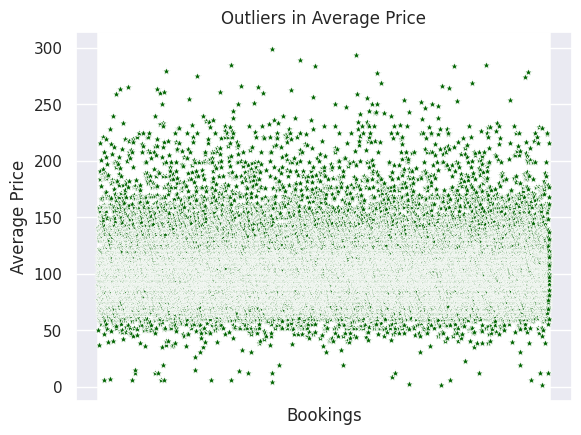

In [ ]:
sns.scatterplot(data=balanced_df,
                x="Booking_ID",
                y="average price",
                 marker="*",
                 color='darkgreen'

                )
plt.xlabel('Bookings')
plt.ylabel('Average Price')
plt.title('Outliers in Average Price')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

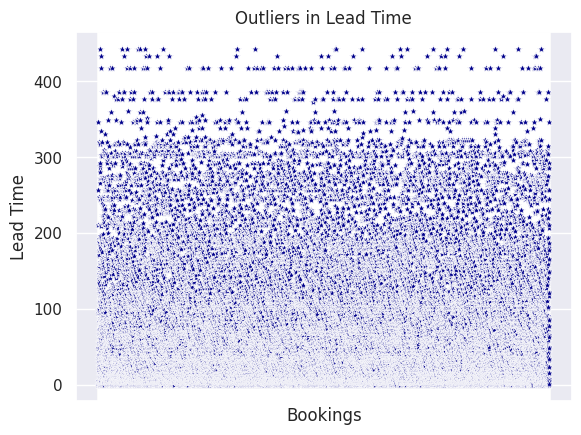

In [ ]:
#Checking the lead time of the dataset
sns.scatterplot(data=balanced_df,
                x="Booking_ID",
                y="lead time",
                 marker="*",
                 color='darkblue'

                )
plt.xlabel('Bookings')
plt.ylabel('Lead Time')
plt.title('Outliers in Lead Time')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [ ]:
#Counting the lead time more than 365 days. Later dropping lead time values greater than 365.
count_more_than_365 = (balanced_df['lead time'] > 365).sum()
print("Number of rows with lead time greater than 365 days:", count_more_than_365)

Number of rows with lead time greater than 365 days: 236


In [ ]:
#Dropping the lead time > 365
balanced_df = balanced_df[(balanced_df['lead time'] < 365)]
balanced_df.reset_index(drop=True, inplace=True)

print("Shape of the DataFrame after dropping outliers:", balanced_df.shape)

Shape of the DataFrame after dropping outliers: (23221, 17)


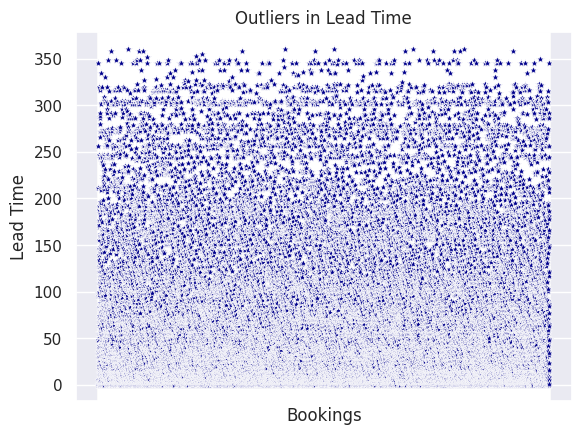

In [ ]:
sns.scatterplot(data=balanced_df,
                x="Booking_ID",
                y="lead time",
                 marker="*",
                 color='darkblue'

                )
plt.xlabel('Bookings')
plt.ylabel('Lead Time')
plt.title('Outliers in Lead Time')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

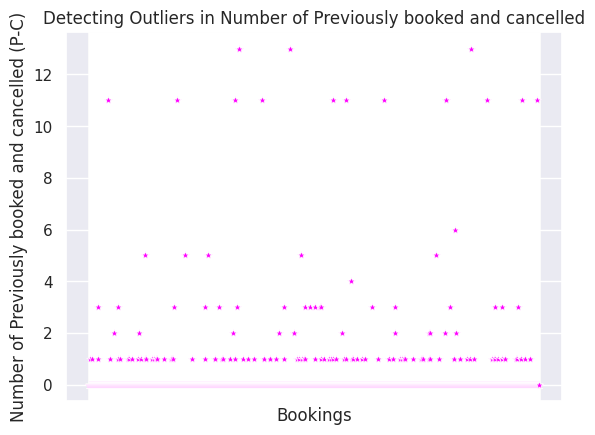

In [ ]:
# Scatter plot for number of previously booked and cancelled nights to see outliers
sns.scatterplot(data=balanced_df,
                x="Booking_ID",
                y="P-C",
                 marker="*",
                 color='magenta'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and cancelled (P-C)')
plt.title('Detecting Outliers in Number of Previously booked and cancelled')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [ ]:
#As seen from the analysis result, there're outliers above and equal to 5.
count_all_above_5 = (balanced_df['P-C'] >= 5).sum()
print("Number of rows with previously booked and cancelled greater and equal to 5:", count_all_above_5)

Number of rows with previously booked and cancelled greater and equal to 5: 22


In [ ]:
balanced_df = balanced_df[(balanced_df['P-C'] <= 5)]
balanced_df.reset_index(drop=True, inplace=True)

print("Shape of the DataFrame after dropping outliers:", balanced_df.shape)

Shape of the DataFrame after dropping outliers: (23204, 17)


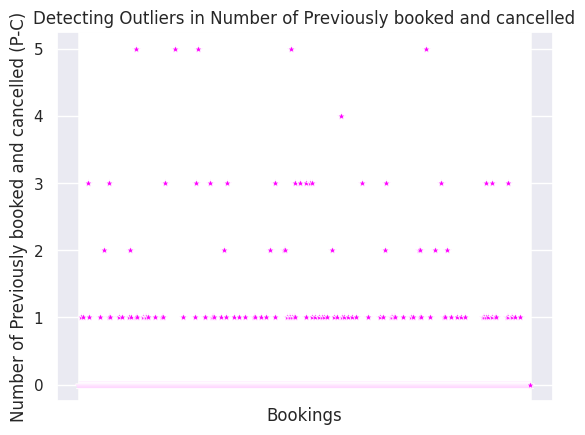

In [ ]:
# Scatter plot for number of previously booked and cancelled nights to see outliers
sns.scatterplot(data=balanced_df,
                x="Booking_ID",
                y="P-C",
                 marker="*",
                 color='magenta'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and cancelled (P-C)')
plt.title('Detecting Outliers in Number of Previously booked and cancelled')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

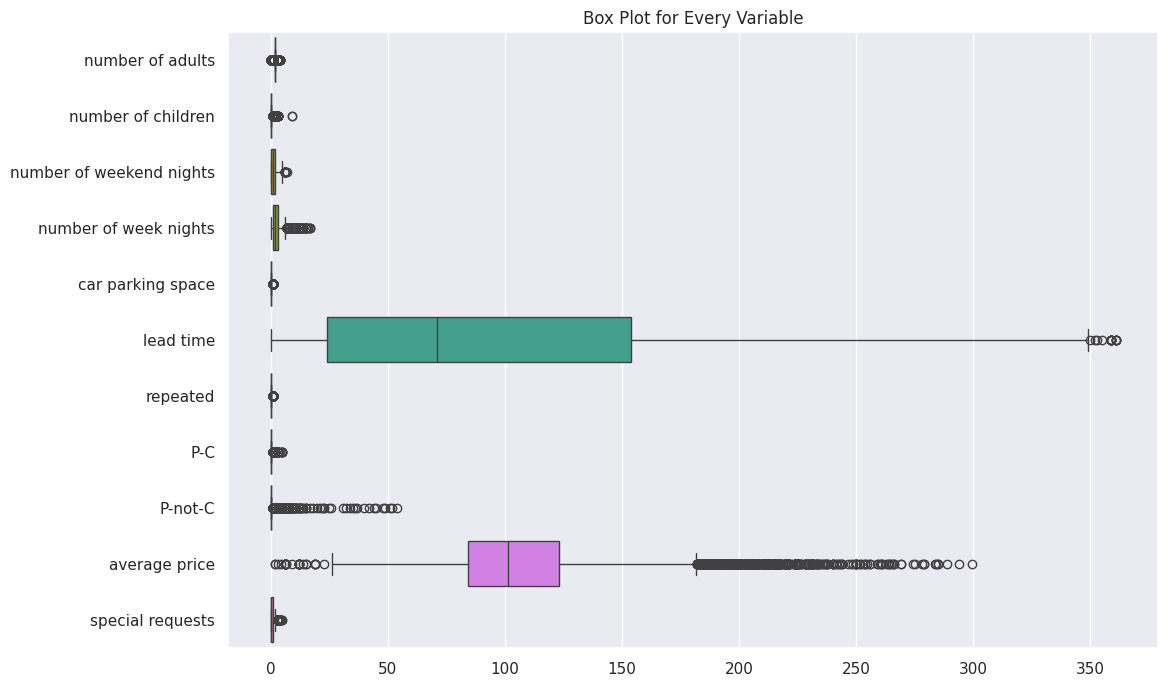

(23204, 17)


In [ ]:
# Create box plots for every variable after dropping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
balanced_df_boxplot = sns.boxplot(data=balanced_df, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(balanced_df.shape)

Further Data Cleaning Process

In [ ]:
#drop booking_id column (booking_id column is used for prediction)
balanced_df.drop(["Booking_ID"], axis=1, inplace=True)
balanced_df.shape
balanced_df.head()

number of adults  number of children  number of weekend nights  \
0                 1                   0                         1   
1                 2                   1                         1   
2                 1                   0                         0   
3                 1                   0                         1   
4                 1                   0                         0   

   number of week nights  type of meal  car parking space    room type  \
0                      3  Not Selected                  0  Room_Type 1   
1                      3   Meal Plan 1                  0  Room_Type 1   
2                      2   Meal Plan 1                  0  Room_Type 1   
3                      2  Not Selected                  0  Room_Type 1   
4                      2   Meal Plan 2                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \
0          5              Online         0    0        0         106.68   
1          1              Online         0    0        0          50.00   
2        211              Online         0    0        0         100.00   
3         48              Online         0    0        0          77.00   
4        346             Offline         0    0        0         100.00   

   special requests date of reservation booking status  
0                 1          2018-11-06   Not_Canceled  
1                 0          2018-02-28       Canceled  
2                 1          2017-05-20       Canceled  
3                 0          2018-04-11       Canceled  
4                 1          2016-09-13       Canceled

In [ ]:
balanced_df.index = balanced_df.index + 1

In [ ]:
balanced_df.head()

number of adults  number of children  number of weekend nights  \
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   
5                 1                   0                         0   

   number of week nights  type of meal  car parking space    room type  \
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   
5                      2   Meal Plan 2                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   
5        346             Offline         0    0        0         100.00   

   special requests date of reservation booking status  
1                 1          2018-11-06   Not_Canceled  
2                 0          2018-02-28       Canceled  
3                 1          2017-05-20       Canceled  
4                 0          2018-04-11       Canceled  
5                 1          2016-09-13       Canceled

In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23204 entries, 1 to 23204
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          23204 non-null  int64         
 1   number of children        23204 non-null  int64         
 2   number of weekend nights  23204 non-null  int64         
 3   number of week nights     23204 non-null  int64         
 4   type of meal              23204 non-null  object        
 5   car parking space         23204 non-null  int64         
 6   room type                 23204 non-null  object        
 7   lead time                 23204 non-null  int64         
 8   market segment type       23204 non-null  object        
 9   repeated                  23204 non-null  int64         
 10  P-C                       23204 non-null  int64         
 11  P-not-C                   23204 non-null  int64         
 12  average price     

Editting the date column to - d/m/y

In [ ]:
balanced_df["date of reservation"] = pd.to_datetime(balanced_df["date of reservation"])

balanced_df["day"] = balanced_df["date of reservation"].dt.day
balanced_df["month"] = balanced_df["date of reservation"].dt.month
balanced_df["year"] = balanced_df["date of reservation"].dt.year

# Drop the original datetime column
balanced_df = balanced_df.drop(columns=["date of reservation"])
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23204 entries, 1 to 23204
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          23204 non-null  int64  
 1   number of children        23204 non-null  int64  
 2   number of weekend nights  23204 non-null  int64  
 3   number of week nights     23204 non-null  int64  
 4   type of meal              23204 non-null  object 
 5   car parking space         23204 non-null  int64  
 6   room type                 23204 non-null  object 
 7   lead time                 23204 non-null  int64  
 8   market segment type       23204 non-null  object 
 9   repeated                  23204 non-null  int64  
 10  P-C                       23204 non-null  int64  
 11  P-not-C                   23204 non-null  int64  
 12  average price             23204 non-null  float64
 13  special requests          23204 non-null  int64  
 14  bookin

In [ ]:
balanced_df.drop(["day" , "month"], axis=1, inplace=True)

In [ ]:
balanced_df.head()

number of adults  number of children  number of weekend nights  \
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   
5                 1                   0                         0   

   number of week nights  type of meal  car parking space    room type  \
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   
5                      2   Meal Plan 2                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   
5        346             Offline         0    0        0         100.00   

   special requests booking status  year  
1                 1   Not_Canceled  2018  
2                 0       Canceled  2018  
3                 1       Canceled  2017  
4                 0       Canceled  2018  
5                 1       Canceled  2016

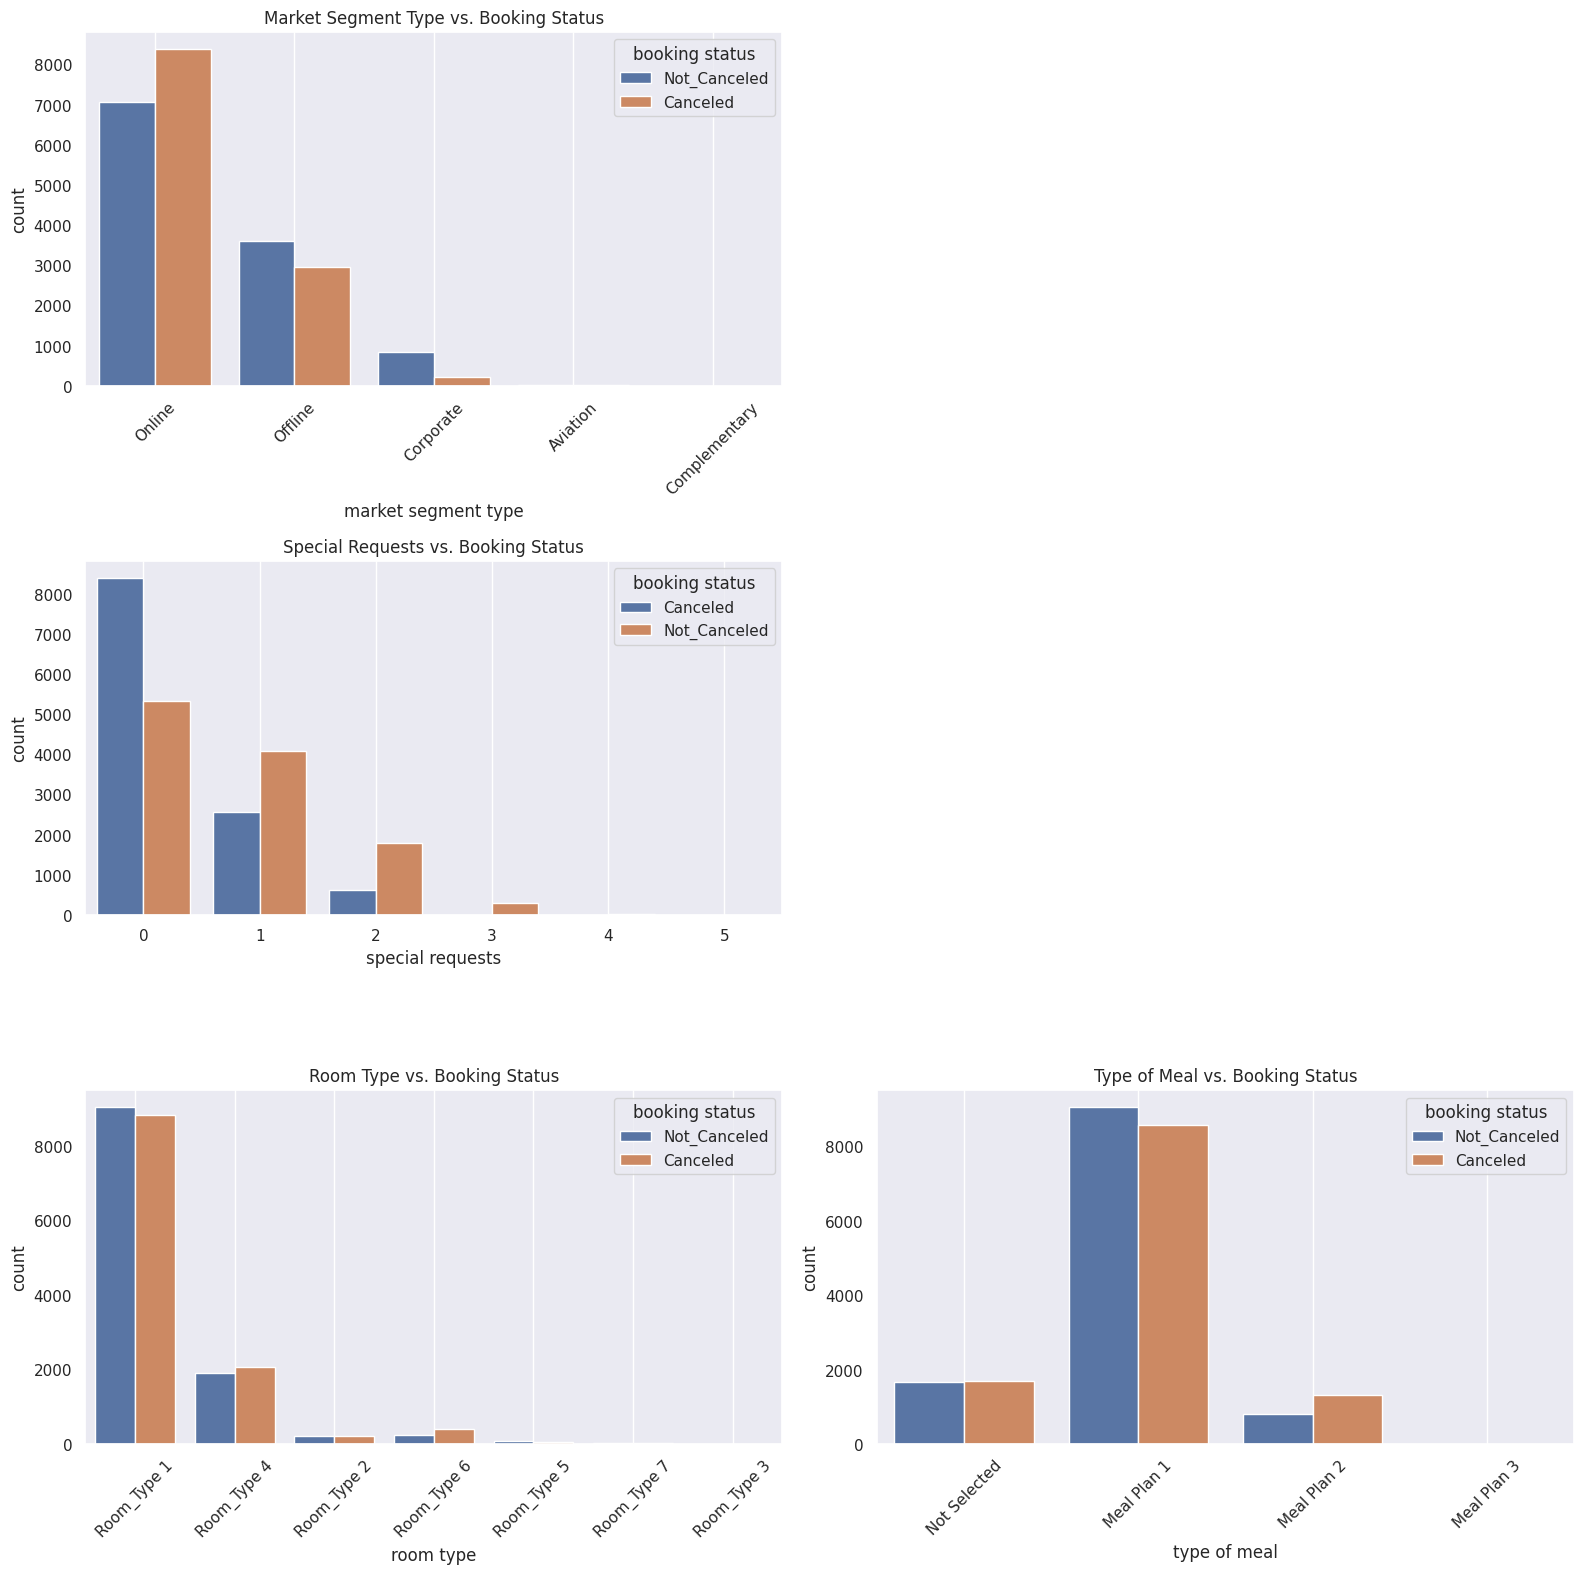

In [ ]:
plt.figure(figsize=(16, 20))

# Chart for market segment type vs. booking status
plt.subplot(4, 2, 1)
sns.countplot(data=balanced_df, x='market segment type', hue='booking status')
plt.xticks(rotation=45)
plt.grid()
plt.title('Market Segment Type vs. Booking Status')

# Chart for special requests vs. booking status
plt.subplot(4, 2, 3)
sns.countplot(data=balanced_df, x='special requests', hue='booking status')
plt.grid()
plt.title('Special Requests vs. Booking Status')

# Chart for room type vs. booking status
plt.subplot(4, 2, 5)
sns.countplot(data=balanced_df, x='room type', hue='booking status')
plt.xticks(rotation=45)
plt.grid()
plt.title('Room Type vs. Booking Status')

# Chart for type of meal vs. booking status
plt.subplot(4, 2, 6)
sns.countplot(data=balanced_df, x='type of meal', hue='booking status')
plt.xticks(rotation=45)
plt.grid()
plt.title('Type of Meal vs. Booking Status')

plt.tight_layout()
plt.show()


booking status for cancelled is 1 and not cancelled is 0.

In [ ]:
balanced_df["booking status"] = balanced_df["booking status"].replace("Canceled", 1)
balanced_df["booking status"] = balanced_df["booking status"].replace("Not_Canceled", 0)

Round float values to integer

In [ ]:
balanced_df["average price"] = balanced_df["average price"].round().astype(int)

One-hot encoder

In [ ]:
# one-hot encoder application
object_columns = balanced_df.select_dtypes(include=["object"]).columns
balanced_df = pd.get_dummies(balanced_df, columns=object_columns)
balanced_df = balanced_df.replace({True: 1, False: 0})
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23204 entries, 1 to 23204
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   number of adults                   23204 non-null  int64
 1   number of children                 23204 non-null  int64
 2   number of weekend nights           23204 non-null  int64
 3   number of week nights              23204 non-null  int64
 4   car parking space                  23204 non-null  int64
 5   lead time                          23204 non-null  int64
 6   repeated                           23204 non-null  int64
 7   P-C                                23204 non-null  int64
 8   P-not-C                            23204 non-null  int64
 9   average price                      23204 non-null  int64
 10  special requests                   23204 non-null  int64
 11  booking status                     23204 non-null  int64
 12  year              

In [ ]:
balanced_df.head()

number of adults  number of children  number of weekend nights  \
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   
5                 1                   0                         0   

   number of week nights  car parking space  lead time  repeated  P-C  \
1                      3                  0          5         0    0   
2                      3                  0          1         0    0   
3                      2                  0        211         0    0   
4                      2                  0         48         0    0   
5                      2                  0        346         0    0   

   P-not-C  average price  ...  room type_Room_Type 3  room type_Room_Type 4  \
1        0            107  ...                      0                      0   
2        0             50  ...                      0                      0   
3        0            100  ...                      0                      0   
4        0             77  ...                      0                      0   
5        0            100  ...                      0                      0   

   room type_Room_Type 5  room type_Room_Type 6  room type_Room_Type 7  \
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   
5                      0                      0                      0   

   market segment type_Aviation  market segment type_Complementary  \
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   
5                             0                                  0   

   market segment type_Corporate  market segment type_Offline  \
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   
5                              0                            1   

   market segment type_Online  
1                           1  
2                           1  
3                           1  
4                           1  
5                           0  

[5 rows x 29 columns]

Data Splitting into Train and Test

In [ ]:
# Splitting the data into features (X) and target variable (y)
X = balanced_df.drop('booking status', axis=1)
y = balanced_df['booking status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Length of the dataset: {len(X)}')
print(f'Length of the training dataset: {len(X_train)}')
print(f'Length of the test dataset: {len(X_test)}')

Length of the dataset: 23204
Length of the training dataset: 18563
Length of the test dataset: 4641


Using Classification Methods

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold, cross_val_score
import statistics
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_pred = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)

# Logistic Regression
logistic_report = classification_report(y_test, logistic_pred)
print("Logistic Regression Report:")
print(logistic_report)

Logistic Regression Accuracy: 0.7690152984270632
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2320
           1       0.78      0.75      0.77      2321

    accuracy                           0.77      4641
   macro avg       0.77      0.77      0.77      4641
weighted avg       0.77      0.77      0.77      4641



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logistic_model = LogisticRegression()
# Prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(logistic_model, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross-Validation Scores:', scores)
print('Accuracy: %.3f (%.3f)' % (statistics.mean(scores), np.std(scores)))
# Fit the model on the entire training data
logistic_model.fit(X_scaled, y)
X_test_scaled = scaler.transform(X_test)
logistic_pred = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy on Test Set:", logistic_accuracy)

logistic_report = classification_report(y_test, logistic_pred)
print("Logistic Regression Report:")
print(logistic_report)

Cross-Validation Scores: [0.76260233 0.74666092 0.78026713 0.77251185 0.77931034 0.78965517
 0.77327586 0.78146552 0.77241379 0.78103448 0.77682034 0.78759156
 0.77768203 0.77768203 0.7612069  0.76982759 0.77241379 0.77586207
 0.77801724 0.775      0.75915554 0.77638949 0.78328307 0.77552779
 0.7862069  0.775      0.76939655 0.76465517 0.76767241 0.7862069 ]
Accuracy: 0.774 (0.009)
Logistic Regression Accuracy on Test Set: 0.7692307692307693
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2320
           1       0.78      0.75      0.77      2321

    accuracy                           0.77      4641
   macro avg       0.77      0.77      0.77      4641
weighted avg       0.77      0.77      0.77      4641



In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

# Decision Tree
dt_report = classification_report(y_test, dt_pred)
print("Decision Tree Report:")
print(dt_report)

Decision Tree Accuracy: 0.8263305322128851
Decision Tree Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2320
           1       0.83      0.82      0.83      2321

    accuracy                           0.83      4641
   macro avg       0.83      0.83      0.83      4641
weighted avg       0.83      0.83      0.83      4641



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dt_model = DecisionTreeClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(dt_model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross-Validation Scores:', scores)
print('Accuracy: %.3f (%.3f)' % (statistics.mean(scores), np.std(scores)))
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy on Test Set:", dt_accuracy)
dt_report = classification_report(y_test, dt_pred)
print("Decision Tree Report:")
print(dt_report)

Cross-Validation Scores: [0.82606354 0.83791061 0.819063   0.82219828 0.8200431  0.8205819
 0.82273707 0.82435345 0.83836207 0.81573276 0.83198708 0.83144857
 0.83521809 0.83189655 0.83189655 0.8362069  0.84698276 0.81788793
 0.83351293 0.82596983 0.83844911 0.82283253 0.82390953 0.82650862
 0.82920259 0.82327586 0.83836207 0.82219828 0.828125   0.84267241]
Accuracy: 0.829 (0.008)
Decision Tree Accuracy on Test Set: 0.8284852402499462
Decision Tree Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2320
           1       0.83      0.83      0.83      2321

    accuracy                           0.83      4641
   macro avg       0.83      0.83      0.83      4641
weighted avg       0.83      0.83      0.83      4641



In [ ]:
# Support Vector Machine (SVM)
svm_model = svm.SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# Support Vector Machine (SVM)
svm_report = classification_report(y_test, svm_pred)
print("SVM Report:")
print(svm_report)

SVM Accuracy: 0.8041370394311571
SVM Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2320
           1       0.81      0.80      0.80      2321

    accuracy                           0.80      4641
   macro avg       0.80      0.80      0.80      4641
weighted avg       0.80      0.80      0.80      4641



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = svm.SVC()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(svm_model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross-Validation Scores:', scores)
print('Accuracy: %.3f (%.3f)' % (statistics.mean(scores), np.std(scores)))
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy on Test Set:", svm_accuracy)
svm_report = classification_report(y_test, svm_pred)
print("SVM Report:")
print(svm_report)

Cross-Validation Scores: [0.80452342 0.81152396 0.80990845 0.79256466 0.80765086 0.8044181
 0.79418103 0.80334052 0.78556034 0.79040948 0.80775444 0.80560043
 0.80883145 0.80549569 0.80172414 0.79903017 0.79795259 0.78717672
 0.78286638 0.80118534 0.80829295 0.80129241 0.78298331 0.79148707
 0.80010776 0.78125    0.8049569  0.8049569  0.80603448 0.80872845]
Accuracy: 0.800 (0.009)
SVM Accuracy on Test Set: 0.8041370394311571
SVM Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2320
           1       0.81      0.80      0.80      2321

    accuracy                           0.80      4641
   macro avg       0.80      0.80      0.80      4641
weighted avg       0.80      0.80      0.80      4641



In [ ]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# K-Nearest Neighbors (KNN)
knn_report = classification_report(y_test, knn_pred)
print("KNN Report:")
print(knn_report)

KNN Accuracy: 0.8224520577461754
KNN Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2320
           1       0.82      0.83      0.82      2321

    accuracy                           0.82      4641
   macro avg       0.82      0.82      0.82      4641
weighted avg       0.82      0.82      0.82      4641



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model = KNeighborsClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(knn_model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross-Validation Scores:', scores)
print('Accuracy: %.3f (%.3f)' % (statistics.mean(scores), np.std(scores)))
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy on Test Set:", knn_accuracy)
knn_report = classification_report(y_test, knn_pred)
print("KNN Report:")
print(knn_report)


Cross-Validation Scores: [0.82229402 0.82014001 0.82283253 0.8200431  0.8200431  0.81357759
 0.82489224 0.82758621 0.8200431  0.82327586 0.82821756 0.82283253
 0.81690899 0.82758621 0.82273707 0.82543103 0.84051724 0.80926724
 0.81088362 0.81788793 0.80775444 0.81637049 0.82821756 0.80872845
 0.82381466 0.81088362 0.82273707 0.83459052 0.82974138 0.82112069]
Accuracy: 0.821 (0.007)
KNN Accuracy on Test Set: 0.8224520577461754
KNN Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2320
           1       0.82      0.83      0.82      2321

    accuracy                           0.82      4641
   macro avg       0.82      0.82      0.82      4641
weighted avg       0.82      0.82      0.82      4641



In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Random Forest Classifier
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Report:")
print(rf_report)

Random Forest Accuracy: 0.8644688644688645
Random Forest Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2320
           1       0.87      0.86      0.86      2321

    accuracy                           0.86      4641
   macro avg       0.86      0.86      0.86      4641
weighted avg       0.86      0.86      0.86      4641



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf_model = RandomForestClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf_model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross-Validation Scores:', scores)
print('Accuracy: %.3f (%.3f)' % (statistics.mean(scores), np.std(scores)))
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy on Test Set:", rf_accuracy)
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Report:")
print(rf_report)

Cross-Validation Scores: [0.8734518  0.86968228 0.85568121 0.86530172 0.86637931 0.86099138
 0.86799569 0.86584052 0.86314655 0.86099138 0.86322025 0.85675821
 0.86645127 0.87068966 0.85452586 0.87068966 0.88685345 0.84428879
 0.86153017 0.86476293 0.85891222 0.8546042  0.86052773 0.86476293
 0.86853448 0.85344828 0.86260776 0.87769397 0.86530172 0.86961207]
Accuracy: 0.864 (0.008)
Random Forest Accuracy on Test Set: 0.8670545141133377
Random Forest Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2320
           1       0.87      0.86      0.87      2321

    accuracy                           0.87      4641
   macro avg       0.87      0.87      0.87      4641
weighted avg       0.87      0.87      0.87      4641



In [ ]:
results_list = []

# Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_pred)
results_list.append({'Model': 'Logistic Regression', 'Accuracy': logistic_accuracy})

# Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
results_list.append({'Model': 'Decision Tree', 'Accuracy': dt_accuracy})

# Support Vector Machine (SVM)
svm_accuracy = accuracy_score(y_test, svm_pred)
results_list.append({'Model': 'SVM', 'Accuracy': svm_accuracy})

# K-Nearest Neighbors (KNN)
knn_accuracy = accuracy_score(y_test, knn_pred)
results_list.append({'Model': 'KNN', 'Accuracy': knn_accuracy})

# Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_pred)
results_list.append({'Model': 'Random Forest', 'Accuracy': rf_accuracy})

# Create DataFrame from the list of results
results_balanced_df = pd.DataFrame(results_list)

# Change the index to start from 1 instead of 0
results_balanced_df.index += 1

# Display the results DataFrame
print("Results:")
print(results_balanced_df)


Results:
                 Model  Accuracy
1  Logistic Regression  0.769231
2        Decision Tree  0.828485
3                  SVM  0.804137
4                  KNN  0.822452
5        Random Forest  0.867055


Using ANN method (Tensorflow)

The patience parameter in early stopping refers to the number of epochs with no improvement in the monitored metric (e.g., validation loss) after which training will be stopped. It essentially allows the model to continue training for a specified number of epochs after the last observed improvement, giving it a chance to recover from any temporary issues and possibly find a better solution.

Patience allows you to control how many epochs the training should continue without improvement before stopping.
Lower patience values result in quicker stopping but might miss out on potential improvements.
Higher patience values allow for more exploration but can significantly increase training time.
Choosing the right patience depends on the specific problem and dataset. It often requires experimentation and cross-validation to find the optimal value.

In [ ]:
import tensorflow as tf

Epoch 1/200
465/465 [==============================] - 2s 3ms/step - loss: 29.1068 - accuracy: 0.5615 - val_loss: 0.6228 - val_accuracy: 0.6184
Epoch 2/200
465/465 [==============================] - 2s 4ms/step - loss: 0.7762 - accuracy: 0.5928 - val_loss: 0.6286 - val_accuracy: 0.6089
Epoch 3/200
465/465 [==============================] - 2s 4ms/step - loss: 0.7226 - accuracy: 0.6131 - val_loss: 0.6525 - val_accuracy: 0.6380
Epoch 4/200
465/465 [==============================] - 2s 4ms/step - loss: 0.7116 - accuracy: 0.6223 - val_loss: 0.6566 - val_accuracy: 0.5947
Epoch 5/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6624 - accuracy: 0.6384 - val_loss: 0.5678 - val_accuracy: 0.7051
Epoch 6/200
465/465 [==============================] - 1s 2ms/step - loss: 0.6382 - accuracy: 0.6542 - val_loss: 0.5744 - val_accuracy: 0.6967
Epoch 7/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6147 - accuracy: 0.6702 - val_loss: 0.5795 - val_accuracy: 0.694

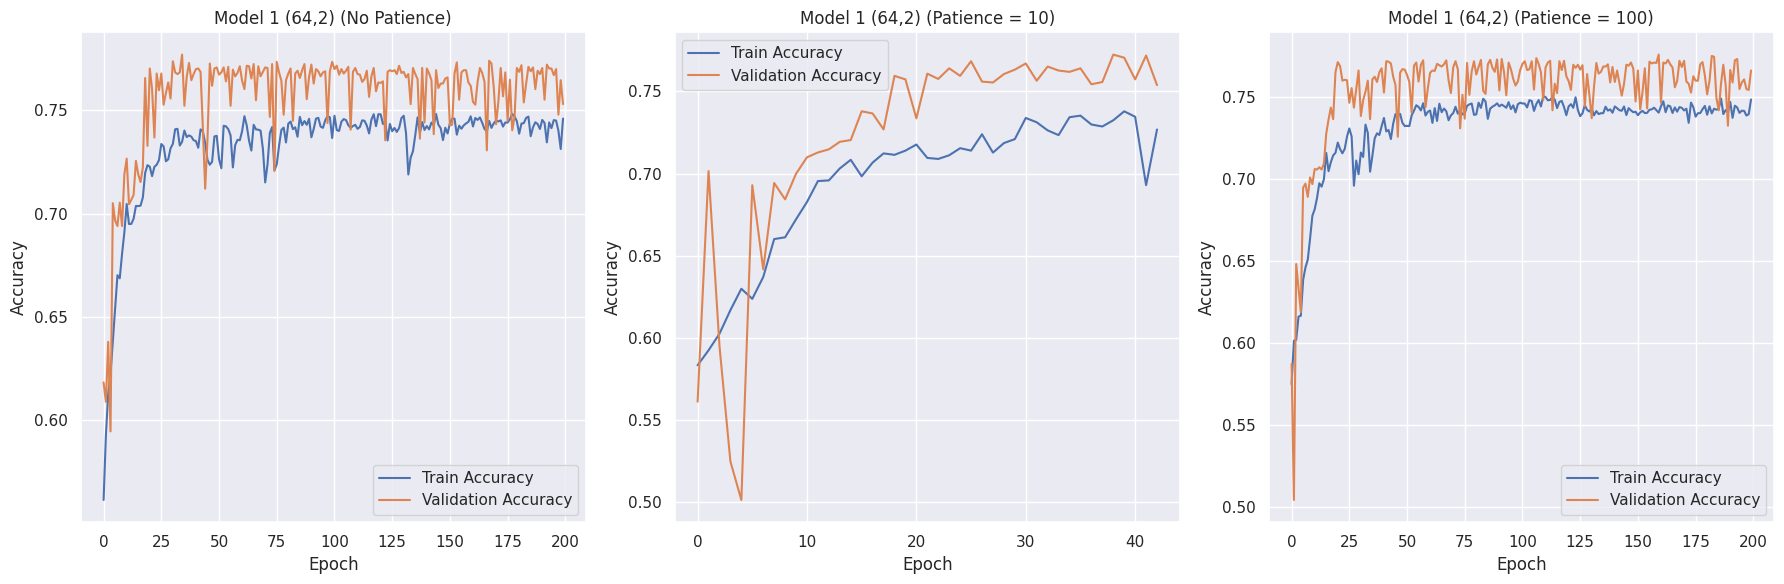

146/146 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7569
Model 1 (64,2) no patience Test loss: 0.4778
Model 1 (64,2) no patience Test accuracy: 0.7569
146/146 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7591
Model 1 (64,2) patience 10 Test loss: 0.4903
Model 1 (64,2) patience 10 Test accuracy: 0.7591
146/146 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7684
Model 1 (64,2) patience 100 Test loss: 0.5020
Model 1 (64,2) patience 100 Test accuracy: 0.7684


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, patience):
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])
    return history

# Train Model 1 (No Patience)
model_1 = create_model()
history_1 = model_1.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Train Model 2 (Patience = 10)
model_2 = create_model()
history_2 = train_model(model_2, X_train, y_train, patience=10)

# Train Model 3 (Patience = 100)
model_3 = create_model()
history_3 = train_model(model_3, X_train, y_train, patience=100)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 (64,2) (No Patience)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 (64,2) (Patience = 10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 (64,2) (Patience = 100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_result_1 = model_1.evaluate(X_test, y_test)
print(f'Model 1 (64,2) no patience Test loss: {test_result_1[0]:.4f}')
print(f'Model 1 (64,2) no patience Test accuracy: {test_result_1[1]:.4f}')

test_result_2 = model_2.evaluate(X_test, y_test)
print(f'Model 1 (64,2) patience 10 Test loss: {test_result_2[0]:.4f}')
print(f'Model 1 (64,2) patience 10 Test accuracy: {test_result_2[1]:.4f}')

test_result_3 = model_3.evaluate(X_test, y_test)
print(f'Model 1 (64,2) patience 100 Test loss: {test_result_3[0]:.4f}')
print(f'Model 1 (64,2) patience 100 Test accuracy: {test_result_3[1]:.4f}')


Epoch 1/200
465/465 [==============================] - 2s 4ms/step - loss: 33.8538 - accuracy: 0.5768 - val_loss: 1.0459 - val_accuracy: 0.5839
Epoch 2/200
465/465 [==============================] - 2s 4ms/step - loss: 0.7839 - accuracy: 0.6143 - val_loss: 0.6106 - val_accuracy: 0.6448
Epoch 3/200
465/465 [==============================] - 2s 4ms/step - loss: 0.6946 - accuracy: 0.6282 - val_loss: 1.1944 - val_accuracy: 0.5537
Epoch 4/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6648 - accuracy: 0.6409 - val_loss: 0.5643 - val_accuracy: 0.6932
Epoch 5/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6325 - accuracy: 0.6525 - val_loss: 0.5829 - val_accuracy: 0.6957
Epoch 6/200
465/465 [==============================] - 1s 2ms/step - loss: 0.6195 - accuracy: 0.6629 - val_loss: 0.5719 - val_accuracy: 0.6949
Epoch 7/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6012 - accuracy: 0.6723 - val_loss: 0.6129 - val_accuracy: 0.658

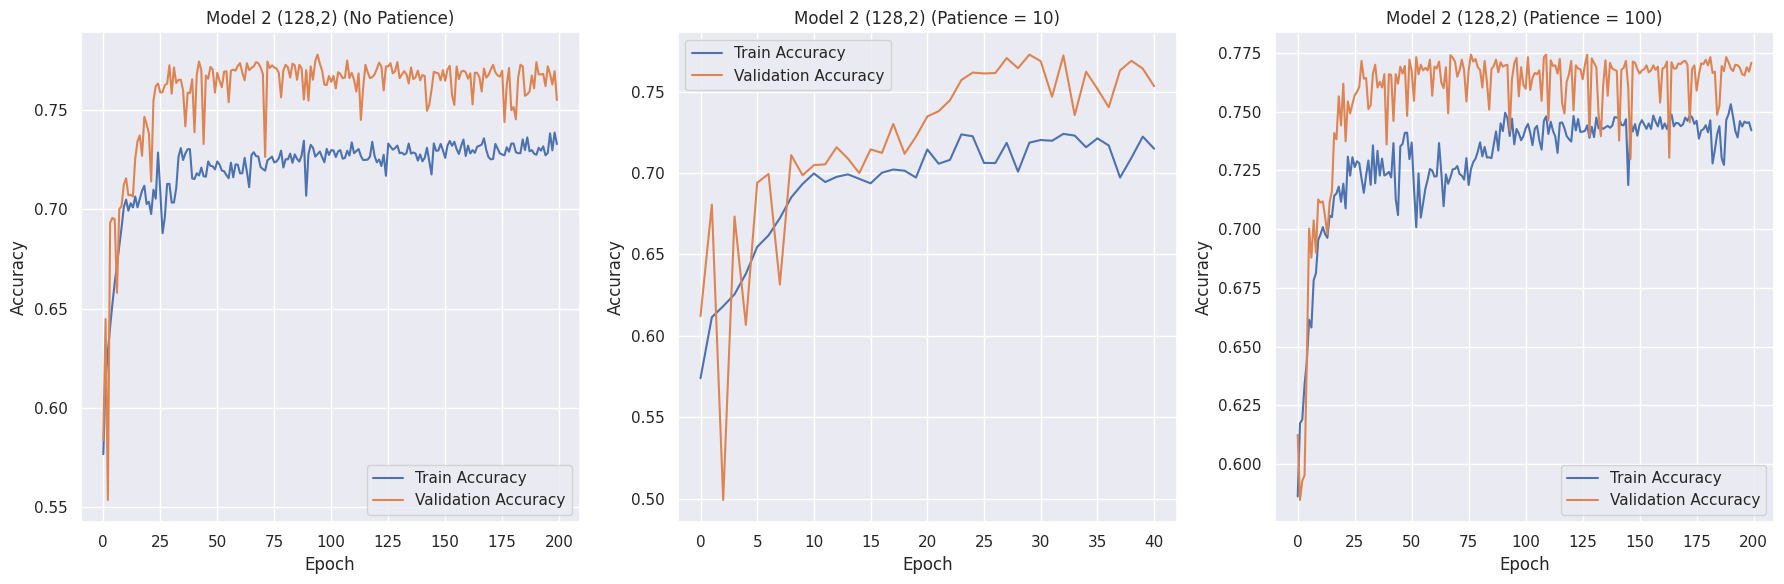

146/146 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7557
Model 2 (128,2) no patience Test loss: 0.4787
Model 2 (128,2) no patience Test accuracy: 0.7557
146/146 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7651
Model 2 (128,2) patience 10 Test loss: 0.4799
Model 2 (128,2) patience 10 Test accuracy: 0.7651
146/146 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7654
Model 2 (128,2) patience 100 Test loss: 0.4745
Model 2 (128,2) patience 100 Test accuracy: 0.7654


In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, patience):
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])
    return history

# Train Model 1 (No Patience)
model_4 = create_model()
history_4 = model_4.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Train Model 2 (Patience = 10)
model_5 = create_model()
history_5 = train_model(model_5, X_train, y_train, patience=10)

# Train Model 3 (Patience = 100)
model_6 = create_model()
history_6 = train_model(model_6, X_train, y_train, patience=100)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 (128,2) (No Patience)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 (128,2) (Patience = 10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 (128,2) (Patience = 100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_result_1 = model_4.evaluate(X_test, y_test)
print(f'Model 2 (128,2) no patience Test loss: {test_result_1[0]:.4f}')
print(f'Model 2 (128,2) no patience Test accuracy: {test_result_1[1]:.4f}')

test_result_2 = model_5.evaluate(X_test, y_test)
print(f'Model 2 (128,2) patience 10 Test loss: {test_result_2[0]:.4f}')
print(f'Model 2 (128,2) patience 10 Test accuracy: {test_result_2[1]:.4f}')

test_result_3 = model_6.evaluate(X_test, y_test)
print(f'Model 2 (128,2) patience 100 Test loss: {test_result_3[0]:.4f}')
print(f'Model 2 (128,2) patience 100 Test accuracy: {test_result_3[1]:.4f}')

Epoch 1/200
465/465 [==============================] - 2s 3ms/step - loss: 23.2122 - accuracy: 0.5892 - val_loss: 1.0044 - val_accuracy: 0.5828
Epoch 2/200
465/465 [==============================] - 1s 3ms/step - loss: 0.9424 - accuracy: 0.6240 - val_loss: 0.6973 - val_accuracy: 0.6415
Epoch 3/200
465/465 [==============================] - 1s 3ms/step - loss: 0.8064 - accuracy: 0.6298 - val_loss: 1.8709 - val_accuracy: 0.5128
Epoch 4/200
465/465 [==============================] - 1s 3ms/step - loss: 0.7526 - accuracy: 0.6359 - val_loss: 0.5813 - val_accuracy: 0.6908
Epoch 5/200
465/465 [==============================] - 2s 4ms/step - loss: 0.6592 - accuracy: 0.6543 - val_loss: 0.5544 - val_accuracy: 0.7037
Epoch 6/200
465/465 [==============================] - 2s 5ms/step - loss: 0.6206 - accuracy: 0.6727 - val_loss: 0.5756 - val_accuracy: 0.6973
Epoch 7/200
465/465 [==============================] - 1s 3ms/step - loss: 0.5959 - accuracy: 0.6846 - val_loss: 0.5609 - val_accuracy: 0.703

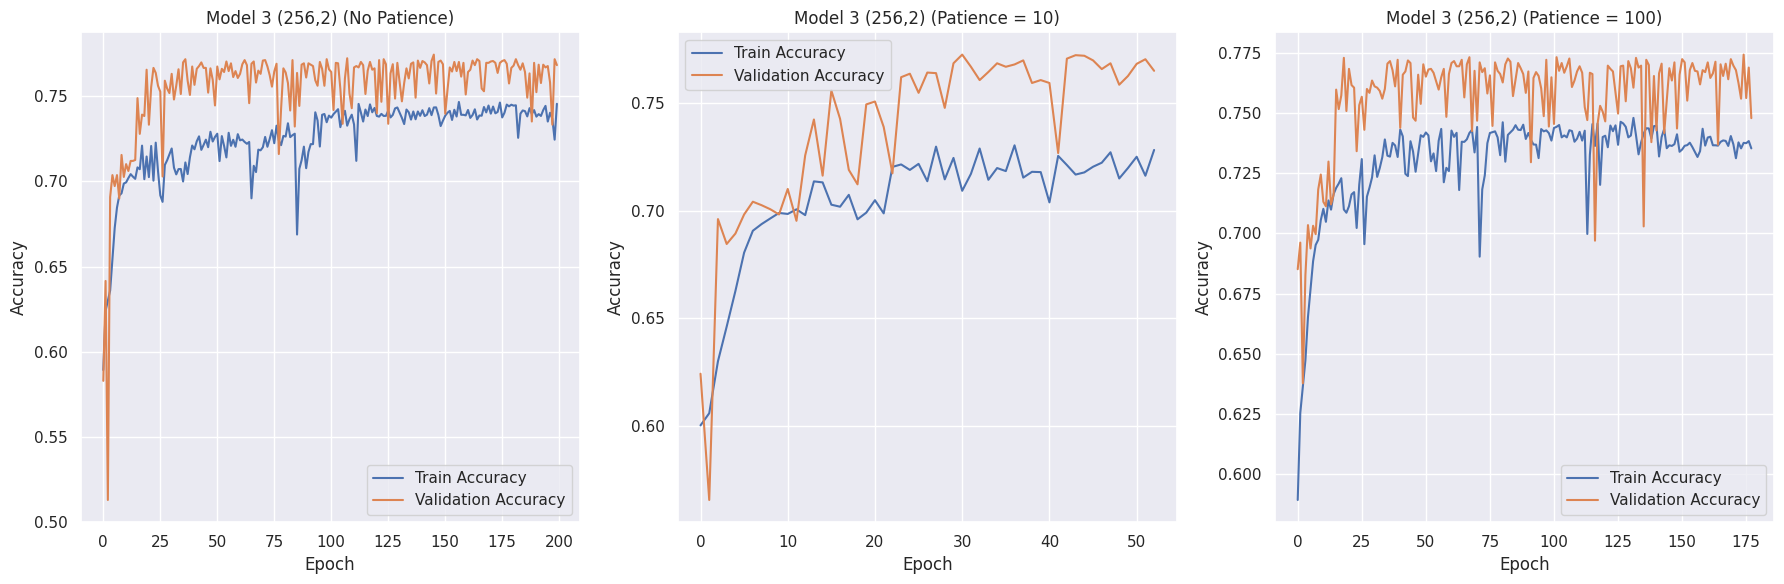

146/146 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7688
Model 3 (256,2) no patience Test loss: 0.4864
Model 3 (256,2) no patience Test accuracy: 0.7688
146/146 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7647
Model 3 (256,2) patience 10 Test loss: 0.4785
Model 3 (256,2) patience 10 Test accuracy: 0.7647
146/146 [==============================] - 1s 4ms/step - loss: 0.4711 - accuracy: 0.7669
Model 3 (256,2) patience 100 Test loss: 0.4711
Model 3 (256,2) patience 100 Test accuracy: 0.7669


In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, patience):
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])
    return history

# Train Model 1 (No Patience)
model_7 = create_model()
history_7 = model_7.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Train Model 2 (Patience = 10)
model_8 = create_model()
history_8 = train_model(model_8, X_train, y_train, patience=10)

# Train Model 3 (Patience = 100)
model_9 = create_model()
history_9 = train_model(model_9, X_train, y_train, patience=100)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_7.history['accuracy'], label='Train Accuracy')
plt.plot(history_7.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 (256,2) (No Patience)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_8.history['accuracy'], label='Train Accuracy')
plt.plot(history_8.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 (256,2) (Patience = 10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_9.history['accuracy'], label='Train Accuracy')
plt.plot(history_9.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 (256,2) (Patience = 100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_result_1 = model_7.evaluate(X_test, y_test)
print(f'Model 3 (256,2) no patience Test loss: {test_result_1[0]:.4f}')
print(f'Model 3 (256,2) no patience Test accuracy: {test_result_1[1]:.4f}')

test_result_2 = model_8.evaluate(X_test, y_test)
print(f'Model 3 (256,2) patience 10 Test loss: {test_result_2[0]:.4f}')
print(f'Model 3 (256,2) patience 10 Test accuracy: {test_result_2[1]:.4f}')

test_result_3 = model_9.evaluate(X_test, y_test)
print(f'Model 3 (256,2) patience 100 Test loss: {test_result_3[0]:.4f}')
print(f'Model 3 (256,2) patience 100 Test accuracy: {test_result_3[1]:.4f}')

Epoch 1/200
465/465 [==============================] - 3s 5ms/step - loss: 45.2243 - accuracy: 0.5474 - val_loss: 0.8751 - val_accuracy: 0.5850
Epoch 2/200
465/465 [==============================] - 1s 3ms/step - loss: 0.8191 - accuracy: 0.6082 - val_loss: 0.9129 - val_accuracy: 0.5066
Epoch 3/200
465/465 [==============================] - 1s 2ms/step - loss: 0.7814 - accuracy: 0.6065 - val_loss: 0.6306 - val_accuracy: 0.6590
Epoch 4/200
465/465 [==============================] - 1s 3ms/step - loss: 0.7524 - accuracy: 0.6108 - val_loss: 0.6056 - val_accuracy: 0.6647
Epoch 5/200
465/465 [==============================] - 1s 2ms/step - loss: 0.6784 - accuracy: 0.6291 - val_loss: 0.5868 - val_accuracy: 0.6809
Epoch 6/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6631 - accuracy: 0.6358 - val_loss: 0.6684 - val_accuracy: 0.6184
Epoch 7/200
465/465 [==============================] - 1s 2ms/step - loss: 0.6501 - accuracy: 0.6439 - val_loss: 0.5904 - val_accuracy: 0.686

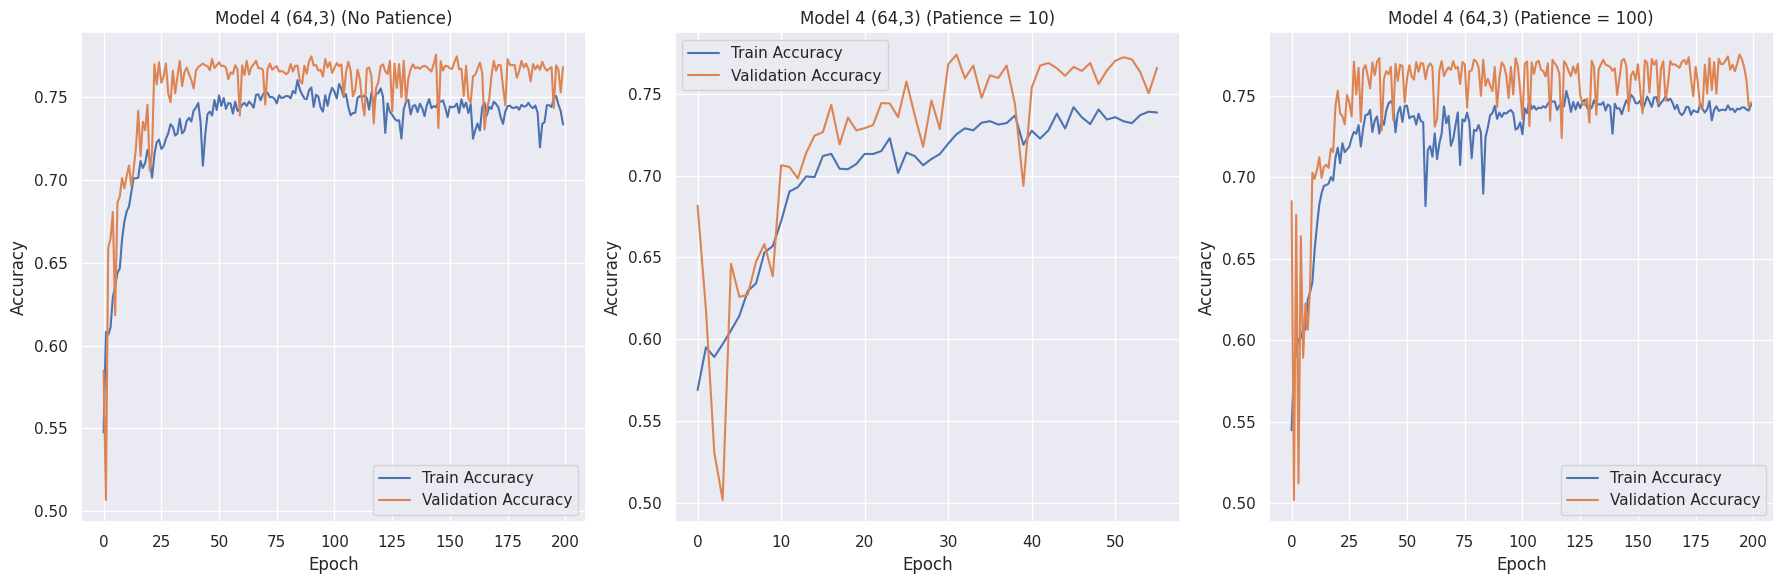

146/146 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7692
Model 4 (64,3) no patience Test loss: 0.4840
Model 4 (64,3) no patience Test accuracy: 0.7692
146/146 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7638
Model 4 (64,3) patience 10 Test loss: 0.4774
Model 4 (64,3) patience 10 Test accuracy: 0.7638
146/146 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7552
Model 4 (64,3) patience 100 Test loss: 0.5162
Model 4 (64,3) patience 100 Test accuracy: 0.7552


In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, patience):
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])
    return history

# Train Model 1 (No Patience)
model_10 = create_model()
history_10 = model_10.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Train Model 2 (Patience = 10)
model_11= create_model()
history_11 = train_model(model_11, X_train, y_train, patience=10)

# Train Model 3 (Patience = 100)
model_12 = create_model()
history_12 = train_model(model_12, X_train, y_train, patience=100)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_10.history['accuracy'], label='Train Accuracy')
plt.plot(history_10.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 4 (64,3) (No Patience)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_11.history['accuracy'], label='Train Accuracy')
plt.plot(history_11.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 4 (64,3) (Patience = 10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_12.history['accuracy'], label='Train Accuracy')
plt.plot(history_12.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 4 (64,3) (Patience = 100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_result_1 = model_10.evaluate(X_test, y_test)
print(f'Model 4 (64,3) no patience Test loss: {test_result_1[0]:.4f}')
print(f'Model 4 (64,3) no patience Test accuracy: {test_result_1[1]:.4f}')

test_result_2 = model_11.evaluate(X_test, y_test)
print(f'Model 4 (64,3) patience 10 Test loss: {test_result_2[0]:.4f}')
print(f'Model 4 (64,3) patience 10 Test accuracy: {test_result_2[1]:.4f}')

test_result_3 = model_12.evaluate(X_test, y_test)
print(f'Model 4 (64,3) patience 100 Test loss: {test_result_3[0]:.4f}')
print(f'Model 4 (64,3) patience 100 Test accuracy: {test_result_3[1]:.4f}')

Epoch 1/200
465/465 [==============================] - 2s 3ms/step - loss: 30.0413 - accuracy: 0.5804 - val_loss: 0.6541 - val_accuracy: 0.7027
Epoch 2/200
465/465 [==============================] - 1s 2ms/step - loss: 0.9044 - accuracy: 0.6084 - val_loss: 1.5926 - val_accuracy: 0.4999
Epoch 3/200
465/465 [==============================] - 2s 4ms/step - loss: 0.8353 - accuracy: 0.6116 - val_loss: 1.5461 - val_accuracy: 0.4988
Epoch 4/200
465/465 [==============================] - 2s 4ms/step - loss: 0.7779 - accuracy: 0.6229 - val_loss: 0.7558 - val_accuracy: 0.6022
Epoch 5/200
465/465 [==============================] - 2s 3ms/step - loss: 0.7154 - accuracy: 0.6248 - val_loss: 0.8444 - val_accuracy: 0.5920
Epoch 6/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6865 - accuracy: 0.6392 - val_loss: 0.6483 - val_accuracy: 0.6927
Epoch 7/200
465/465 [==============================] - 1s 2ms/step - loss: 0.6474 - accuracy: 0.6583 - val_loss: 0.5820 - val_accuracy: 0.701

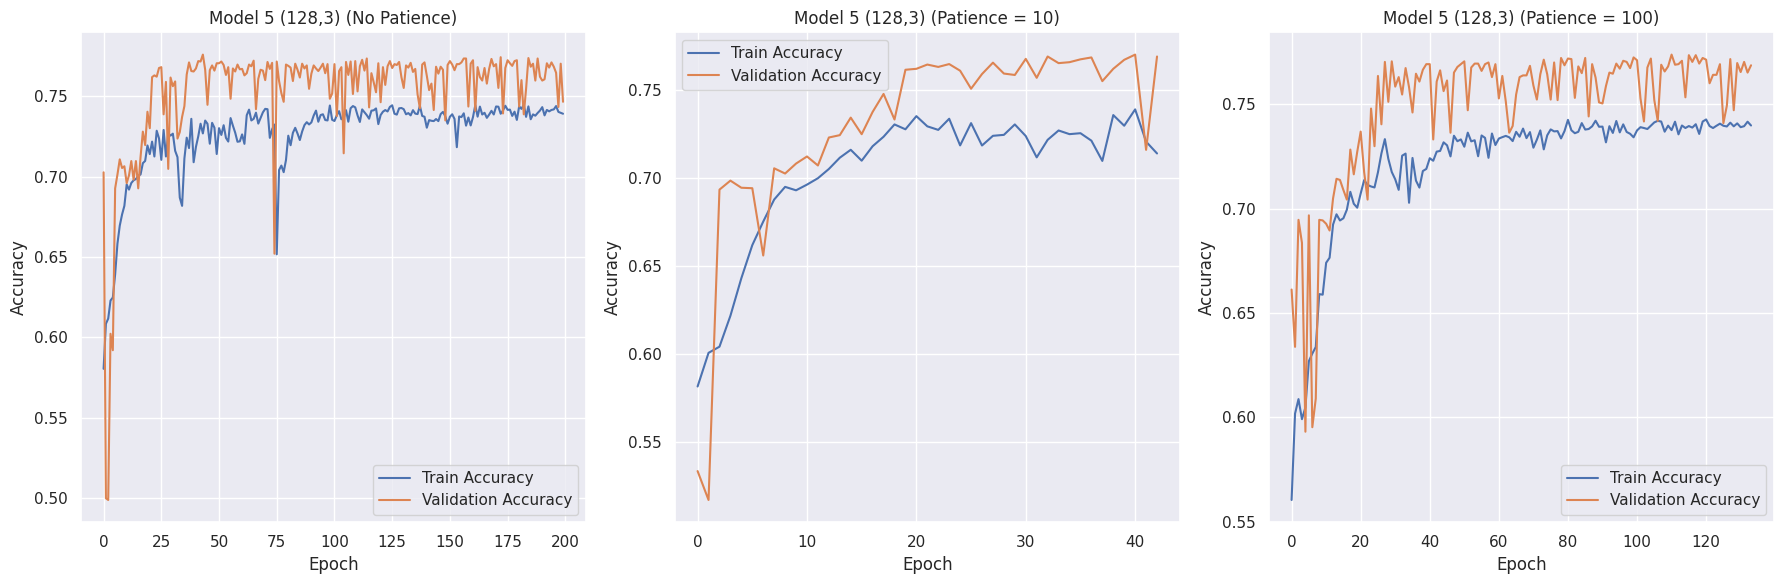

146/146 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7544
Model 5 (128,3) no patience Test loss: 0.5203
Model 5 (128,3) no patience Test accuracy: 0.7544
146/146 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7658
Model 5 (128,3) patience 10 Test loss: 0.4814
Model 5 (128,3) patience 10 Test accuracy: 0.7658
146/146 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7673
Model 5 (128,3) patience 100 Test loss: 0.4946
Model 5 (128,3) patience 100 Test accuracy: 0.7673


In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, patience):
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])
    return history

# Train Model 1 (No Patience)
model_13 = create_model()
history_13 = model_13.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Train Model 2 (Patience = 10)
model_14= create_model()
history_14 = train_model(model_14, X_train, y_train, patience=10)

# Train Model 3 (Patience = 100)
model_15 = create_model()
history_15 = train_model(model_15, X_train, y_train, patience=100)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_13.history['accuracy'], label='Train Accuracy')
plt.plot(history_13.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 5 (128,3) (No Patience)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_14.history['accuracy'], label='Train Accuracy')
plt.plot(history_14.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 5 (128,3) (Patience = 10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_15.history['accuracy'], label='Train Accuracy')
plt.plot(history_15.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 5 (128,3) (Patience = 100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_result_1 = model_13.evaluate(X_test, y_test)
print(f'Model 5 (128,3) no patience Test loss: {test_result_1[0]:.4f}')
print(f'Model 5 (128,3) no patience Test accuracy: {test_result_1[1]:.4f}')

test_result_2 = model_14.evaluate(X_test, y_test)
print(f'Model 5 (128,3) patience 10 Test loss: {test_result_2[0]:.4f}')
print(f'Model 5 (128,3) patience 10 Test accuracy: {test_result_2[1]:.4f}')

test_result_3 = model_15.evaluate(X_test, y_test)
print(f'Model 5 (128,3) patience 100 Test loss: {test_result_3[0]:.4f}')
print(f'Model 5 (128,3) patience 100 Test accuracy: {test_result_3[1]:.4f}')

Epoch 1/200
465/465 [==============================] - 2s 4ms/step - loss: 30.0558 - accuracy: 0.5868 - val_loss: 0.9449 - val_accuracy: 0.6962
Epoch 2/200
465/465 [==============================] - 2s 5ms/step - loss: 1.1680 - accuracy: 0.6079 - val_loss: 0.9864 - val_accuracy: 0.5909
Epoch 3/200
465/465 [==============================] - 2s 4ms/step - loss: 0.8948 - accuracy: 0.6207 - val_loss: 0.8766 - val_accuracy: 0.5300
Epoch 4/200
465/465 [==============================] - 1s 3ms/step - loss: 0.7653 - accuracy: 0.6293 - val_loss: 0.7562 - val_accuracy: 0.5898
Epoch 5/200
465/465 [==============================] - 1s 3ms/step - loss: 0.7183 - accuracy: 0.6425 - val_loss: 0.5964 - val_accuracy: 0.6868
Epoch 6/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6479 - accuracy: 0.6559 - val_loss: 0.5759 - val_accuracy: 0.6892
Epoch 7/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6025 - accuracy: 0.6826 - val_loss: 0.5832 - val_accuracy: 0.697

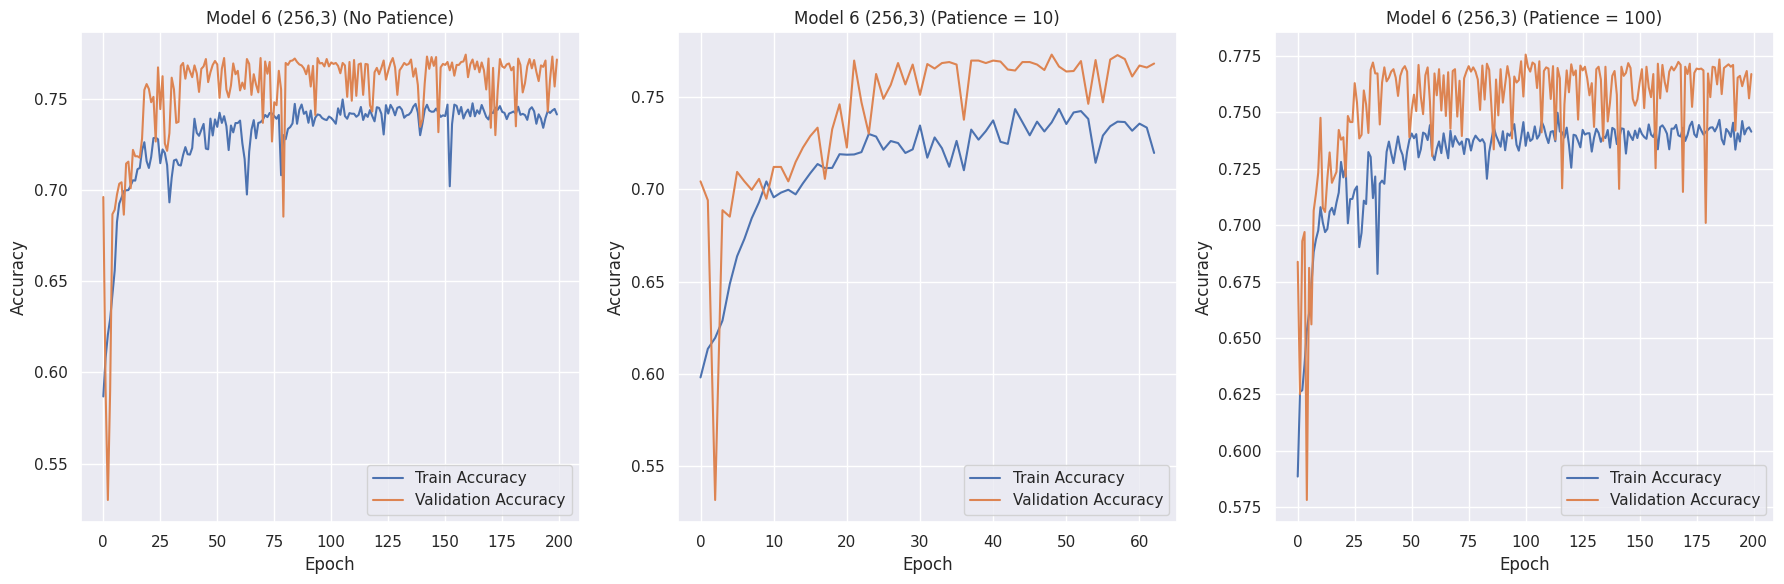

146/146 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7710
Model 6 (256,3) no patience Test loss: 0.4841
Model 6 (256,3) no patience Test accuracy: 0.7710
146/146 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7645
Model 6 (256,3) patience 10 Test loss: 0.4743
Model 6 (256,3) patience 10 Test accuracy: 0.7645
146/146 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7636
Model 6 (256,3) patience 100 Test loss: 0.4843
Model 6 (256,3) patience 100 Test accuracy: 0.7636


In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, patience):
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])
    return history

# Train Model 1 (No Patience)
model_16 = create_model()
history_16 = model_16.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Train Model 2 (Patience = 10)
model_17= create_model()
history_17 = train_model(model_17, X_train, y_train, patience=10)

# Train Model 3 (Patience = 100)
model_18 = create_model()
history_18 = train_model(model_18, X_train, y_train, patience=100)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_16.history['accuracy'], label='Train Accuracy')
plt.plot(history_16.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 6 (256,3) (No Patience)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_17.history['accuracy'], label='Train Accuracy')
plt.plot(history_17.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 6 (256,3) (Patience = 10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_18.history['accuracy'], label='Train Accuracy')
plt.plot(history_18.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 6 (256,3) (Patience = 100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_result_1 = model_16.evaluate(X_test, y_test)
print(f'Model 6 (256,3) no patience Test loss: {test_result_1[0]:.4f}')
print(f'Model 6 (256,3) no patience Test accuracy: {test_result_1[1]:.4f}')

test_result_2 = model_17.evaluate(X_test, y_test)
print(f'Model 6 (256,3) patience 10 Test loss: {test_result_2[0]:.4f}')
print(f'Model 6 (256,3) patience 10 Test accuracy: {test_result_2[1]:.4f}')

test_result_3 = model_18.evaluate(X_test, y_test)
print(f'Model 6 (256,3) patience 100 Test loss: {test_result_3[0]:.4f}')
print(f'Model 6 (256,3) patience 100 Test accuracy: {test_result_3[1]:.4f}')

Epoch 1/200
465/465 [==============================] - 2s 3ms/step - loss: 64.3719 - accuracy: 0.5156 - val_loss: 1.6153 - val_accuracy: 0.5044
Epoch 2/200
465/465 [==============================] - 1s 3ms/step - loss: 1.2498 - accuracy: 0.5809 - val_loss: 0.6892 - val_accuracy: 0.6030
Epoch 3/200
465/465 [==============================] - 2s 4ms/step - loss: 1.1270 - accuracy: 0.5780 - val_loss: 0.9855 - val_accuracy: 0.5790
Epoch 4/200
465/465 [==============================] - 2s 5ms/step - loss: 1.0177 - accuracy: 0.5732 - val_loss: 1.0525 - val_accuracy: 0.5809
Epoch 5/200
465/465 [==============================] - 2s 3ms/step - loss: 0.9123 - accuracy: 0.5900 - val_loss: 0.9661 - val_accuracy: 0.5656
Epoch 6/200
465/465 [==============================] - 1s 3ms/step - loss: 0.8992 - accuracy: 0.5931 - val_loss: 0.9071 - val_accuracy: 0.5290
Epoch 7/200
465/465 [==============================] - 1s 3ms/step - loss: 0.8607 - accuracy: 0.5867 - val_loss: 0.7867 - val_accuracy: 0.592

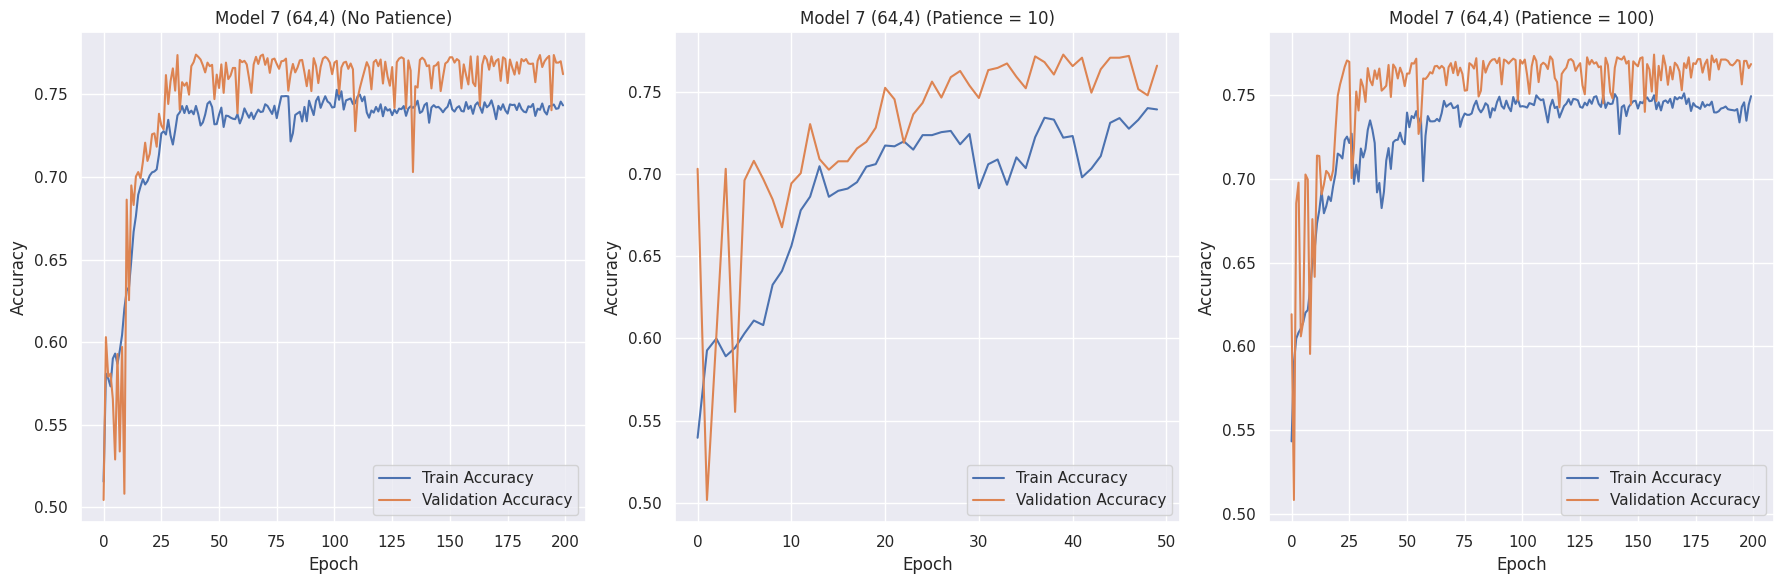

146/146 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7677
Model 7 (64,4) no patience Test loss: 0.5001
Model 7 (64,4) no patience Test accuracy: 0.7677
146/146 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7686
Model 7 (64,4) patience 10 Test loss: 0.4809
Model 7 (64,4) patience 10 Test accuracy: 0.7686
146/146 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7649
Model 7 (64,4) patience 100 Test loss: 0.4982
Model 7 (64,4) patience 100 Test accuracy: 0.7649


In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, patience):
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])
    return history

# Train Model 1 (No Patience)
model_19 = create_model()
history_19 = model_19.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Train Model 2 (Patience = 10)
model_20= create_model()
history_20 = train_model(model_20, X_train, y_train, patience=10)

# Train Model 3 (Patience = 100)
model_21 = create_model()
history_21 = train_model(model_21, X_train, y_train, patience=100)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_19.history['accuracy'], label='Train Accuracy')
plt.plot(history_19.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 7 (64,4) (No Patience)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_20.history['accuracy'], label='Train Accuracy')
plt.plot(history_20.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 7 (64,4) (Patience = 10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_21.history['accuracy'], label='Train Accuracy')
plt.plot(history_21.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 7 (64,4) (Patience = 100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_result_1 = model_19.evaluate(X_test, y_test)
print(f'Model 7 (64,4) no patience Test loss: {test_result_1[0]:.4f}')
print(f'Model 7 (64,4) no patience Test accuracy: {test_result_1[1]:.4f}')

test_result_2 = model_20.evaluate(X_test, y_test)
print(f'Model 7 (64,4) patience 10 Test loss: {test_result_2[0]:.4f}')
print(f'Model 7 (64,4) patience 10 Test accuracy: {test_result_2[1]:.4f}')

test_result_3 = model_21.evaluate(X_test, y_test)
print(f'Model 7 (64,4) patience 100 Test loss: {test_result_3[0]:.4f}')
print(f'Model 7 (64,4) patience 100 Test accuracy: {test_result_3[1]:.4f}')

Epoch 1/200
465/465 [==============================] - 2s 3ms/step - loss: 33.6627 - accuracy: 0.5413 - val_loss: 1.0183 - val_accuracy: 0.5475
Epoch 2/200
465/465 [==============================] - 1s 3ms/step - loss: 0.8990 - accuracy: 0.6081 - val_loss: 0.5897 - val_accuracy: 0.6930
Epoch 3/200
465/465 [==============================] - 2s 4ms/step - loss: 0.9750 - accuracy: 0.5965 - val_loss: 0.6278 - val_accuracy: 0.6375
Epoch 4/200
465/465 [==============================] - 2s 5ms/step - loss: 0.7956 - accuracy: 0.6129 - val_loss: 0.8923 - val_accuracy: 0.5987
Epoch 5/200
465/465 [==============================] - 2s 3ms/step - loss: 0.8240 - accuracy: 0.6137 - val_loss: 0.5889 - val_accuracy: 0.6819
Epoch 6/200
465/465 [==============================] - 1s 3ms/step - loss: 0.7165 - accuracy: 0.6257 - val_loss: 0.6014 - val_accuracy: 0.6914
Epoch 7/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.6349 - val_loss: 0.9478 - val_accuracy: 0.564

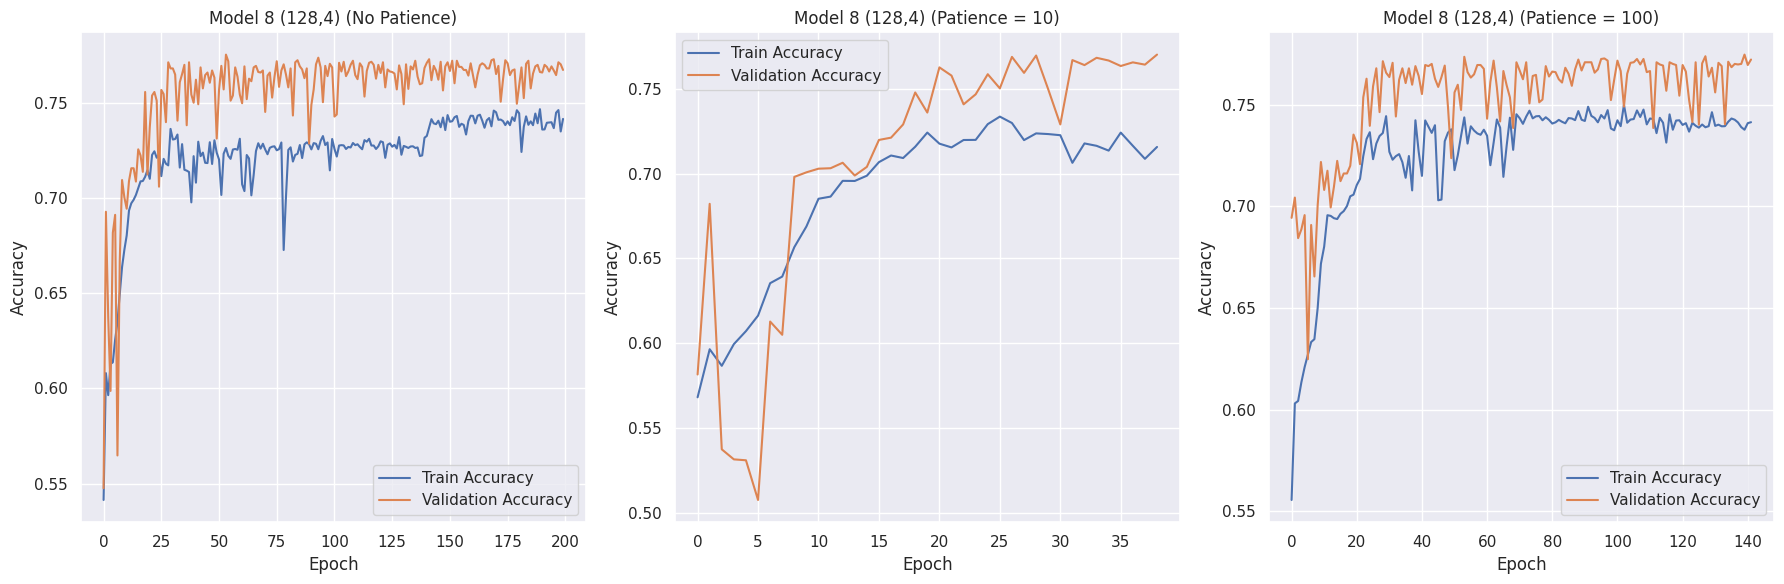

146/146 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7679
Model 8 (128,4) no patience Test loss: 0.5000
Model 8 (128,4) no patience Test accuracy: 0.7679
146/146 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7623
Model 8 (128,4) patience 10 Test loss: 0.4856
Model 8 (128,4) patience 10 Test accuracy: 0.7623
146/146 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7647
Model 8 (128,4) patience 100 Test loss: 0.4782
Model 8 (128,4) patience 100 Test accuracy: 0.7647


In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, patience):
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])
    return history

# Train Model 1 (No Patience)
model_22 = create_model()
history_22 = model_22.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Train Model 2 (Patience = 10)
model_23= create_model()
history_23 = train_model(model_23, X_train, y_train, patience=10)

# Train Model 3 (Patience = 100)
model_24 = create_model()
history_24 = train_model(model_24, X_train, y_train, patience=100)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_22.history['accuracy'], label='Train Accuracy')
plt.plot(history_22.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 8 (128,4) (No Patience)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_23.history['accuracy'], label='Train Accuracy')
plt.plot(history_23.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 8 (128,4) (Patience = 10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_24.history['accuracy'], label='Train Accuracy')
plt.plot(history_24.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 8 (128,4) (Patience = 100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_result_1 = model_22.evaluate(X_test, y_test)
print(f'Model 8 (128,4) no patience Test loss: {test_result_1[0]:.4f}')
print(f'Model 8 (128,4) no patience Test accuracy: {test_result_1[1]:.4f}')

test_result_2 = model_23.evaluate(X_test, y_test)
print(f'Model 8 (128,4) patience 10 Test loss: {test_result_2[0]:.4f}')
print(f'Model 8 (128,4) patience 10 Test accuracy: {test_result_2[1]:.4f}')

test_result_3 = model_24.evaluate(X_test, y_test)
print(f'Model 8 (128,4) patience 100 Test loss: {test_result_3[0]:.4f}')
print(f'Model 8 (128,4) patience 100 Test accuracy: {test_result_3[1]:.4f}')

Epoch 1/200
465/465 [==============================] - 2s 3ms/step - loss: 26.8350 - accuracy: 0.5848 - val_loss: 1.4291 - val_accuracy: 0.5244
Epoch 2/200
465/465 [==============================] - 2s 4ms/step - loss: 1.0527 - accuracy: 0.6071 - val_loss: 1.9215 - val_accuracy: 0.4993
Epoch 3/200
465/465 [==============================] - 2s 4ms/step - loss: 0.8660 - accuracy: 0.6246 - val_loss: 2.0303 - val_accuracy: 0.4985
Epoch 4/200
465/465 [==============================] - 2s 4ms/step - loss: 0.7861 - accuracy: 0.6298 - val_loss: 1.1459 - val_accuracy: 0.5685
Epoch 5/200
465/465 [==============================] - 1s 3ms/step - loss: 0.7052 - accuracy: 0.6482 - val_loss: 0.8325 - val_accuracy: 0.5933
Epoch 6/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6349 - accuracy: 0.6650 - val_loss: 0.5699 - val_accuracy: 0.6919
Epoch 7/200
465/465 [==============================] - 1s 3ms/step - loss: 0.6026 - accuracy: 0.6785 - val_loss: 0.5615 - val_accuracy: 0.707

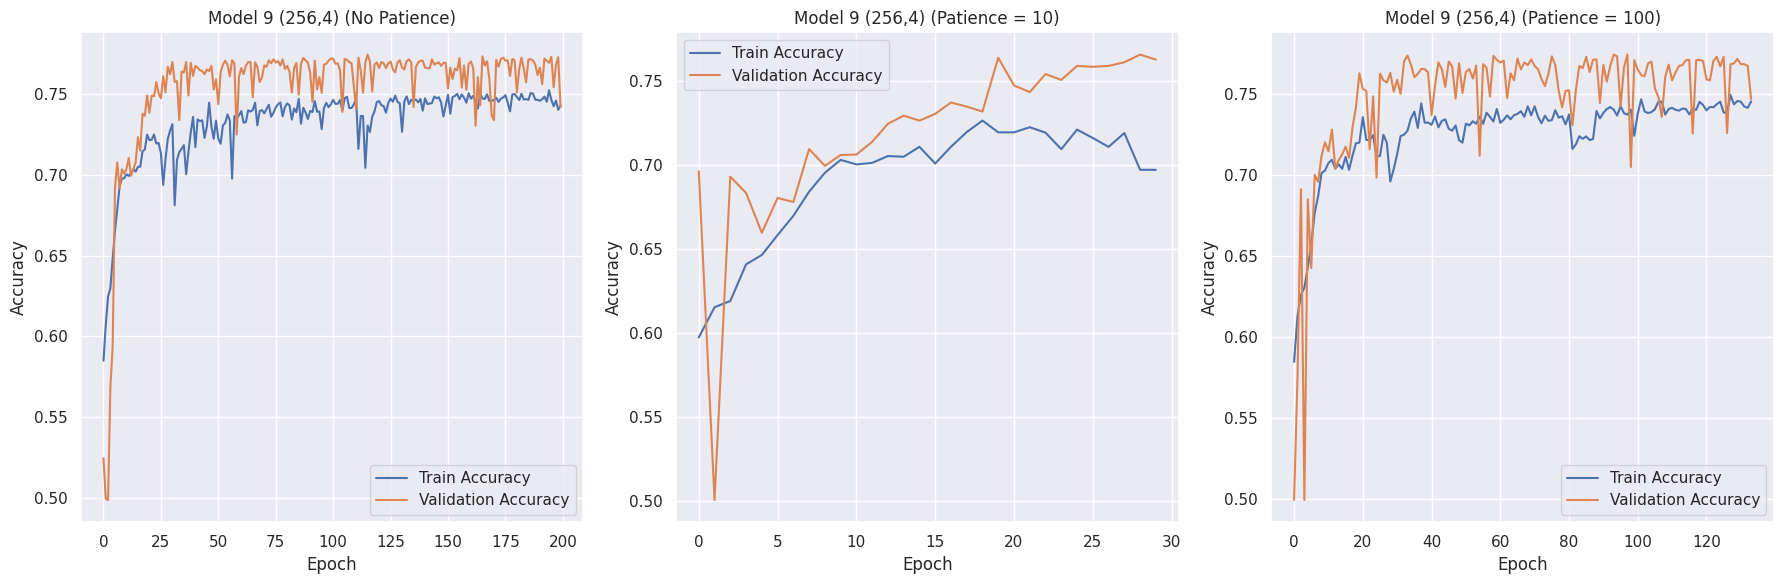

146/146 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7546
Model 9 (256,4) no patience Test loss: 0.4944
Model 9 (256,4) no patience Test accuracy: 0.7546
146/146 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7621
Model 9 (256,4) patience 10 Test loss: 0.4956
Model 9 (256,4) patience 10 Test accuracy: 0.7621
146/146 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7714
Model 9 (256,4) patience 100 Test loss: 0.4872
Model 9 (256,4) patience 100 Test accuracy: 0.7714


In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, patience):
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])
    return history

# Train Model 1 (No Patience)
model_25 = create_model()
history_25 = model_25.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Train Model 2 (Patience = 10)
model_26= create_model()
history_26 = train_model(model_26, X_train, y_train, patience=10)

# Train Model 3 (Patience = 100)
model_27 = create_model()
history_27 = train_model(model_27, X_train, y_train, patience=100)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_25.history['accuracy'], label='Train Accuracy')
plt.plot(history_25.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 9 (256,4) (No Patience)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_26.history['accuracy'], label='Train Accuracy')
plt.plot(history_26.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 9 (256,4) (Patience = 10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_27.history['accuracy'], label='Train Accuracy')
plt.plot(history_27.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 9 (256,4) (Patience = 100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_result_1 = model_25.evaluate(X_test, y_test)
print(f'Model 9 (256,4) no patience Test loss: {test_result_1[0]:.4f}')
print(f'Model 9 (256,4) no patience Test accuracy: {test_result_1[1]:.4f}')

test_result_2 = model_26.evaluate(X_test, y_test)
print(f'Model 9 (256,4) patience 10 Test loss: {test_result_2[0]:.4f}')
print(f'Model 9 (256,4) patience 10 Test accuracy: {test_result_2[1]:.4f}')

test_result_3 = model_27.evaluate(X_test, y_test)
print(f'Model 9 (256,4) patience 100 Test loss: {test_result_3[0]:.4f}')
print(f'Model 9 (256,4) patience 100 Test accuracy: {test_result_3[1]:.4f}')

In [ ]:
# Results for each model
results = {
    'Model 1': {'Relu Density': 64, 'Softmax Density': 2, 'Accuracy': 0.772, 'Loss':0.489},
    'Model 2': {'Relu Density': 128, 'Softmax Density': 2, 'Accuracy': 0.769, 'Loss':0.476},
    'Model 3': {'Relu Density': 256, 'Softmax Density': 2, 'Accuracy': 0.775, 'Loss':0.477},
    'Model 4': {'Relu Density': 64, 'Softmax Density': 3, 'Accuracy': 0.773, 'Loss':0.471},
    'Model 5': {'Relu Density': 128, 'Softmax Density': 3, 'Accuracy': 0.774, 'Loss':0.477},
    'Model 6': {'Relu Density': 256, 'Softmax Density': 3, 'Accuracy': 0.765, 'Loss':0.477},
    'Model 7': {'Relu Density': 64, 'Softmax Density': 4, 'Accuracy': 0.767, 'Loss':0.477},
    'Model 8': {'Relu Density': 128, 'Softmax Density': 4, 'Accuracy': 0.771, 'Loss':0.485},
    'Model 9': {'Relu Density': 256, 'Softmax Density': 4, 'Accuracy': 0.778, 'Loss':0.471}
}
results_balanced_df = pd.DataFrame(results).T

print("Results:")
print(results_balanced_df)

Results:
         Relu Density  Softmax Density  Accuracy   Loss
Model 1          64.0              2.0     0.772  0.489
Model 2         128.0              2.0     0.769  0.476
Model 3         256.0              2.0     0.775  0.477
Model 4          64.0              3.0     0.773  0.471
Model 5         128.0              3.0     0.774  0.477
Model 6         256.0              3.0     0.765  0.477
Model 7          64.0              4.0     0.767  0.477
Model 8         128.0              4.0     0.771  0.485
Model 9         256.0              4.0     0.778  0.471


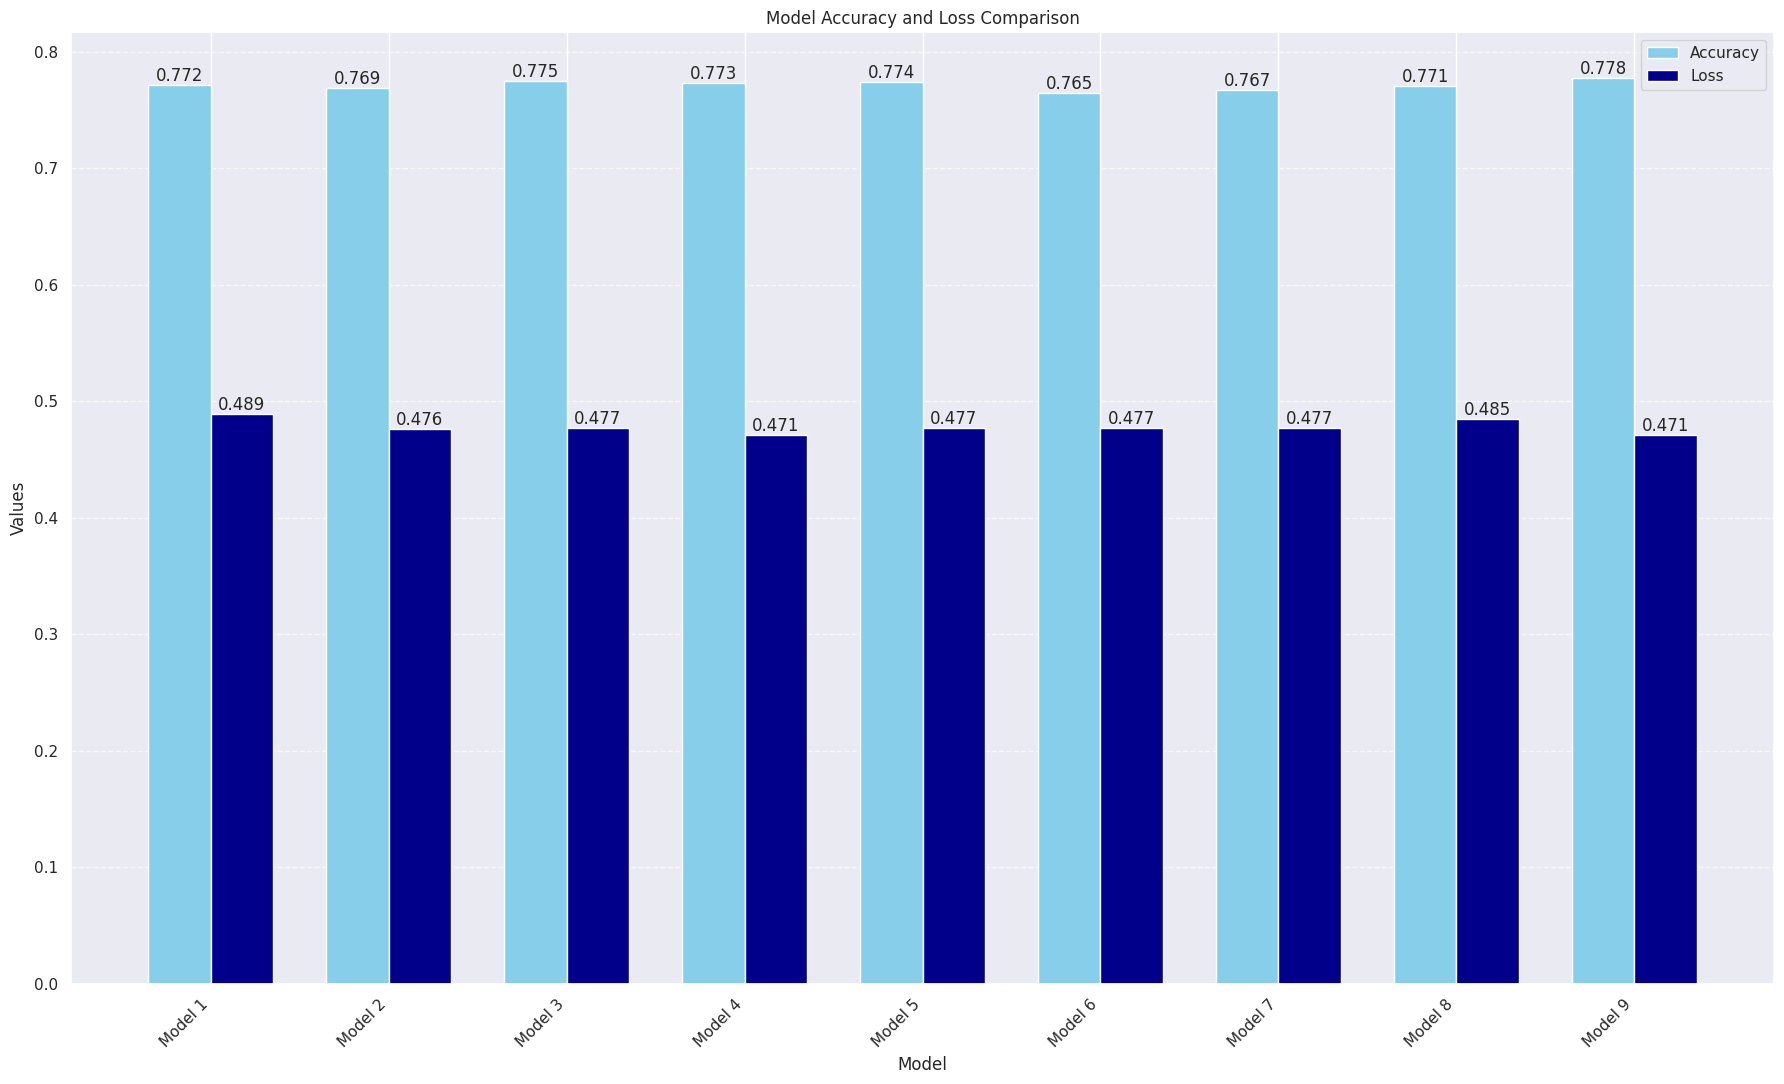

In [ ]:
results_balanced_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9'],
    'Accuracy': [0.772, 0.769, 0.775, 0.773, 0.774, 0.765, 0.767, 0.771, 0.778],  # Sample accuracy values
    'Loss': [0.489, 0.476, 0.477, 0.471, 0.477, 0.477, 0.477 , 0.485 , 0.471]  # Sample loss values
})

plt.figure(figsize=(18, 11))
bar_width = 0.35
index = np.arange(len(results_balanced_df))
plt.bar(index, results_balanced_df['Accuracy'], color='skyblue', width=bar_width, label='Accuracy')
plt.bar(index + bar_width, results_balanced_df['Loss'], color='darkblue', width=bar_width, label='Loss')
for i, (acc, loss) in enumerate(zip(results_balanced_df['Accuracy'], results_balanced_df['Loss'])):
    plt.text(i, acc, f"{acc:.3f}", ha='center', va='bottom')
    plt.text(i + bar_width, loss, f"{loss:.3f}", ha='center', va='bottom')
plt.title('Model Accuracy and Loss Comparison')
plt.xlabel('Model')
plt.ylabel('Values')
plt.xticks(index + bar_width / 2, results_balanced_df['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Results of TensorFlow models
tf_results = [
    {'Model': 'Model 1 (64,2) Patience 10', 'Accuracy': 0.772},
    {'Model': 'Model 2 (128,2) Patience 10', 'Accuracy': 0.769},
    {'Model': 'Model 3 (256,2) Patience 10', 'Accuracy': 0.775},
    {'Model': 'Model 4 (128,3) Patience 10', 'Accuracy': 0.773},
    {'Model': 'Model 5 (128,3) Patience 10', 'Accuracy': 0.774},
    {'Model': 'Model 6 (128,3) Patience 10', 'Accuracy': 0.765},
    {'Model': 'Model 7 (256,4) Patience 10', 'Accuracy': 0.767},
    {'Model': 'Model 8 (256,4) Patience 10', 'Accuracy': 0.771},
    {'Model': 'Model 9 (256,4) Patience 10', 'Accuracy': 0.778}
]

# Results of other models
other_results = [
    {'Model': 'Logistic Regression', 'Accuracy': 0.769},
    {'Model': 'Decision Tree', 'Accuracy': 0.828},
    {'Model': 'SVM', 'Accuracy': 0.804},
    {'Model': 'KNN', 'Accuracy': 0.822},
    {'Model': 'Random Forest', 'Accuracy': 0.867}
]

tf_results_balanced_df = pd.DataFrame(tf_results)
other_results_balanced_df = pd.DataFrame(other_results)
tf_results_balanced_df.index += 1
other_results_balanced_df.index += 10
combined_results_balanced_df = pd.concat([tf_results_balanced_df, other_results_balanced_df], axis=0)

print("Combined Results:")
print(combined_results_balanced_df)

Combined Results:
                          Model  Accuracy
1    Model 1 (64,2) Patience 10     0.772
2   Model 2 (128,2) Patience 10     0.769
3   Model 3 (256,2) Patience 10     0.775
4   Model 4 (128,3) Patience 10     0.773
5   Model 5 (128,3) Patience 10     0.774
6   Model 6 (128,3) Patience 10     0.765
7   Model 7 (256,4) Patience 10     0.767
8   Model 8 (256,4) Patience 10     0.771
9   Model 9 (256,4) Patience 10     0.778
10          Logistic Regression     0.771
11                Decision Tree     0.837
12                          SVM     0.810
13                          KNN     0.824
14                Random Forest     0.874


In [ ]:
# Sorting the combined results
combined_results_balanced_df = combined_results_balanced_df.sort_values(by='Accuracy', ascending=False)
print("Combined Results (Sorted by Accuracy):")
print(combined_results_balanced_df)

Combined Results (Sorted by Accuracy):
                          Model  Accuracy
14                Random Forest     0.874
11                Decision Tree     0.837
13                          KNN     0.824
12                          SVM     0.810
9   Model 9 (256,4) Patience 10     0.778
3   Model 3 (256,2) Patience 10     0.775
5   Model 5 (128,3) Patience 10     0.774
4   Model 4 (128,3) Patience 10     0.773
1    Model 1 (64,2) Patience 10     0.772
8   Model 8 (256,4) Patience 10     0.771
10          Logistic Regression     0.771
2   Model 2 (128,2) Patience 10     0.769
7   Model 7 (256,4) Patience 10     0.767
6   Model 6 (128,3) Patience 10     0.765


<ipython-input-165-6eef8018bac7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_results_df.index, y='Accuracy', data=combined_results_df, palette='viridis')


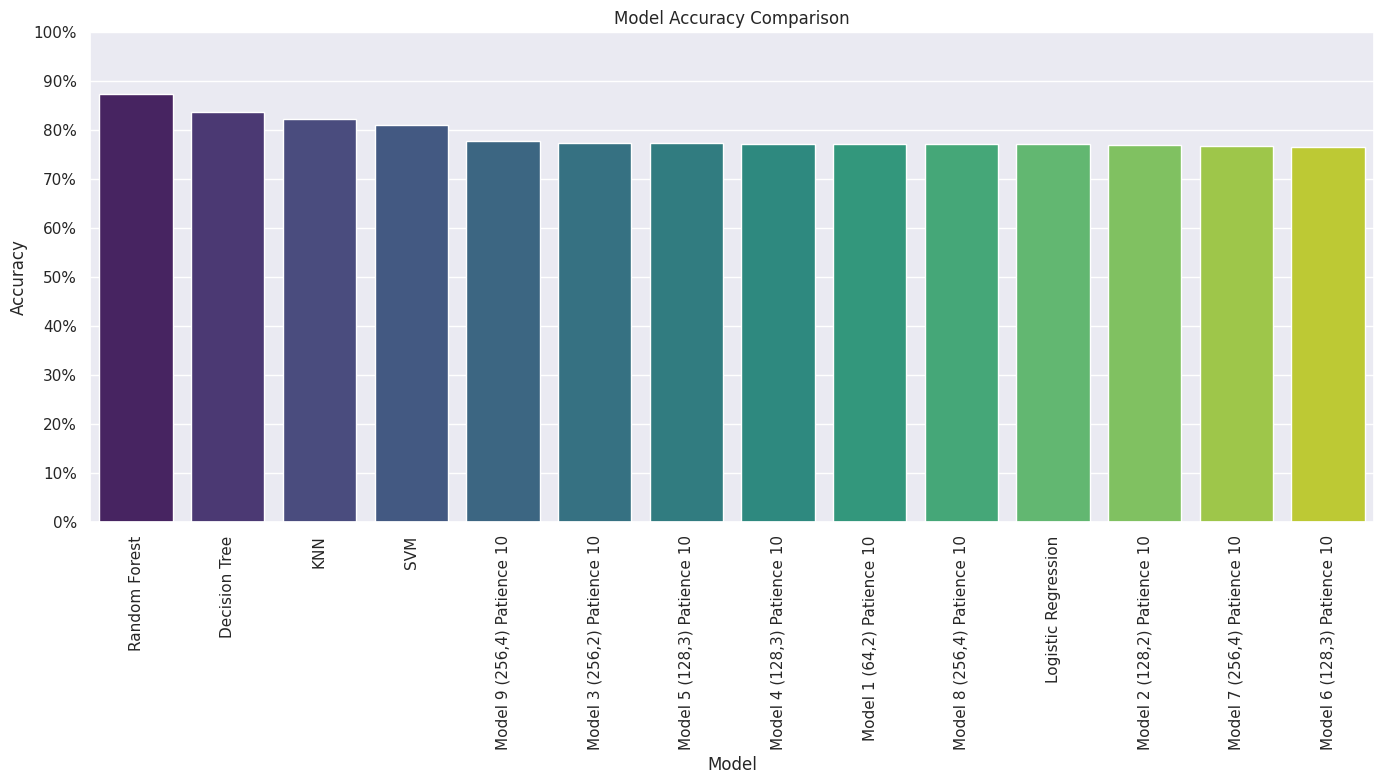

In [ ]:
# Results of TensorFlow models
tf_results = [
    {'Model': 'Model 1 (64,2) Patience 10', 'Accuracy': 0.772},
    {'Model': 'Model 2 (128,2) Patience 10', 'Accuracy': 0.769},
    {'Model': 'Model 3 (256,2) Patience 10', 'Accuracy': 0.775},
    {'Model': 'Model 4 (128,3) Patience 10', 'Accuracy': 0.773},
    {'Model': 'Model 5 (128,3) Patience 10', 'Accuracy': 0.774},
    {'Model': 'Model 6 (128,3) Patience 10', 'Accuracy': 0.765},
    {'Model': 'Model 7 (256,4) Patience 10', 'Accuracy': 0.767},
    {'Model': 'Model 8 (256,4) Patience 10', 'Accuracy': 0.771},
    {'Model': 'Model 9 (256,4) Patience 10', 'Accuracy': 0.778}
]

# Results of other models
other_results = [
    {'Model': 'Logistic Regression', 'Accuracy': 0.771},
    {'Model': 'Decision Tree', 'Accuracy': 0.837},
    {'Model': 'SVM', 'Accuracy': 0.810},
    {'Model': 'KNN', 'Accuracy': 0.824},
    {'Model': 'Random Forest', 'Accuracy': 0.874}
]

tf_results_df = pd.DataFrame(tf_results)
other_results_df = pd.DataFrame(other_results)
tf_results_df.index += 1
other_results_df.index += 10
combined_results_df = pd.concat([tf_results_df, other_results_df], axis=0)
combined_results_df = combined_results_df.sort_values(by='Accuracy', ascending=False)
combined_results_df.reset_index(drop=True, inplace=True)
plt.figure(figsize=(14, 8))
sns.barplot(x=combined_results_df.index, y='Accuracy', data=combined_results_df, palette='viridis')
plt.xticks(ticks=combined_results_df.index, labels=combined_results_df['Model'], rotation=90)
plt.yticks(ticks=[i/10 for i in range(0, 11)], labels=[f'{i*10}%' for i in range(0, 11)])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.tight_layout()
plt.show()

FEATURE IMPORTANCE

In [ ]:
from sklearn.model_selection import cross_val_score
best_model = RandomForestClassifier(n_estimators=200, max_depth=20,random_state=42)
best_model.fit(X_train, y_train)
cv_score= cross_val_score(best_model, X_train, y_train, cv=5, n_jobs=-1).mean()
print("Cv score:" ,cv_score)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Cv score: 0.8658080416430621


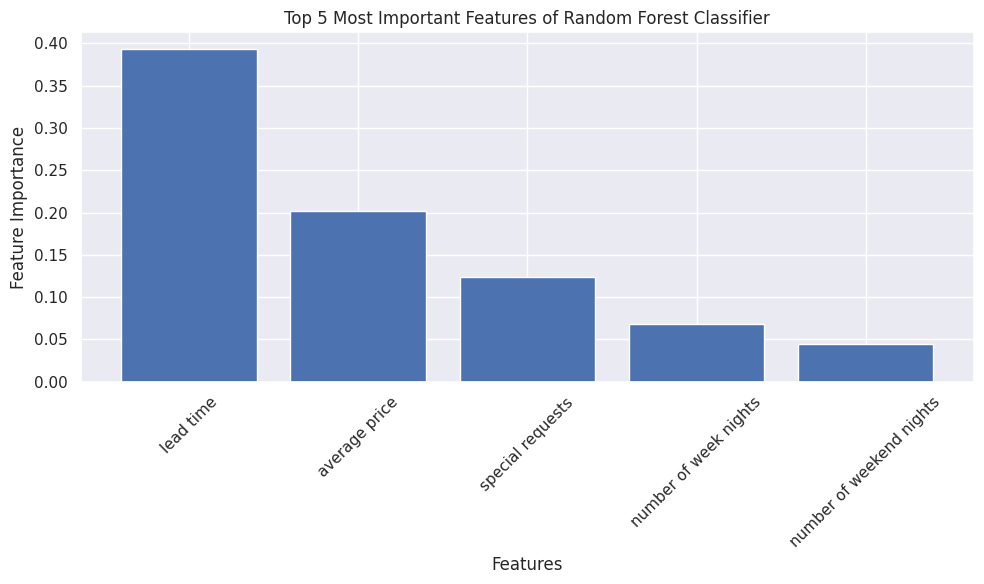

In [ ]:
feature_importances = rf_model.feature_importances_
feature_names = [
    "number of adults",
    "number of children",
    "number of weekend nights",
    "number of week nights",
    "car parking space",
    "lead time",
    "repeated",
    "P-C",
    "P-not-C",
    "average price",
    "special requests",
    "booking status",
    "year",
    "type of meal_Meal Plan 1",
    "type of meal_Meal Plan 2",
    "type of meal_Meal Plan 3",
    "type of meal_Not Selected",
    "room type_Room_Type 1",
    "room type_Room_Type 2",
    "room type_Room_Type 3",
    "room type_Room_Type 4",
    "room type_Room_Type 5",
    "room type_Room_Type 6",
    "room type_Room_Type 7",
    "market segment type_Aviation",
    "market segment type_Complementary",
    "market segment type_Corporate",
    "market segment type_Offline",
    "market segment type_Online"
]
sorted_indices = feature_importances.argsort()[::-1]
top_feature_indices = sorted_indices[:5]
top_feature_names = [feature_names[i] for i in top_feature_indices]
top_feature_importances = [feature_importances[i] for i in top_feature_indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_importances)), top_feature_importances)
plt.xticks(range(len(top_feature_importances)), top_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 5 Most Important Features of Random Forest Classifier')
plt.tight_layout()
plt.show()